This project was completed for the Statistics Module in May 2022. 
The project involved perfroming a time series analysis on car registration data. 
Variations of time series models including SARIMA and ARIMA models were implemented with the aim of evaluating which time series model performed best. The data for this project was provided by NCI. 

## Load relevant libraries 

In [21]:
library(ggplot2)
library(ggthemes)
library(scales)
library(Amelia)
library(dplyr)
library(leaps)
library(MASS)
library(stats)
library(car)
library(haven)
library(ggplot2)
install.packages('forecast')
library(forecast)
install.packages('plotrix')
library(plotrix)
install.packages('smooth')
install.packages('fpp2')
install.packages('tseries')
install.packages('Metrics')
library(smooth)
library(fpp2)
library(tseries)
library(Metrics)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpyN9dGr/downloaded_packages


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpyN9dGr/downloaded_packages



Attaching package: ‘plotrix’


The following object is masked from ‘package:scales’:

    rescale


also installing the dependencies ‘texreg’, ‘greybox’, ‘pracma’, ‘statmod’





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpyN9dGr/downloaded_packages


also installing the dependencies ‘expsmooth’, ‘fma’





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpyN9dGr/downloaded_packages

The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpyN9dGr/downloaded_packages

The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpyN9dGr/downloaded_packages


Loading required package: greybox

Package "greybox", v1.0.8 loaded.


This is package "smooth", v3.2.0


── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ fma       2.5     ✔ expsmooth 2.3




Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




#system('defaults write org.R-project.R force.LANG en_US.UTF-8')

In [80]:
#Turn off warnings 
options(warn=-1)
#Turn on warnings 
#options(warn=0)

## Load and view car registration data 

In [6]:
#load the car registration data 
data <- read.csv("CarRegistrations.csv")

In [7]:
str(data)

'data.frame':	324 obs. of  2 variables:
 $ X1995M01: chr  "1995M02" "1995M03" "1995M04" "1995M05" ...
 $ X10817  : int  8916 9697 10314 9775 7125 9007 6000 4155 3692 2236 ...


In [71]:
summary(data)

  year_month        registrations  
 Length:324         Min.   :  474  
 Class :character   1st Qu.: 4314  
 Mode  :character   Median : 9332  
                    Mean   :10510  
                    3rd Qu.:15404  
                    Max.   :32961  

## Transform data

In [8]:
#rename variables
names(data)[names(data) == "X1995M01"] <- "year_month"
names(data)[names(data) == "X10817"] <- "registrations"

In [9]:
#isolate the second column
carreg <- data[,2]

In [22]:
#LOG
lcarreg <- log(carreg)
ts_lcarreg <- ts(lcarreg, start =c(1995,1), frequency = 12)
lfit <- stl(lcarreg, s.window='period')
plot(lfit)

ERROR: Error in stl(lcarreg, s.window = "period"): series is not periodic or has less than two periods


# Time Series Model 

In [23]:
#simple time series model
ts_carreg <- ts(carreg, start =c(1995,1), frequency = 12)

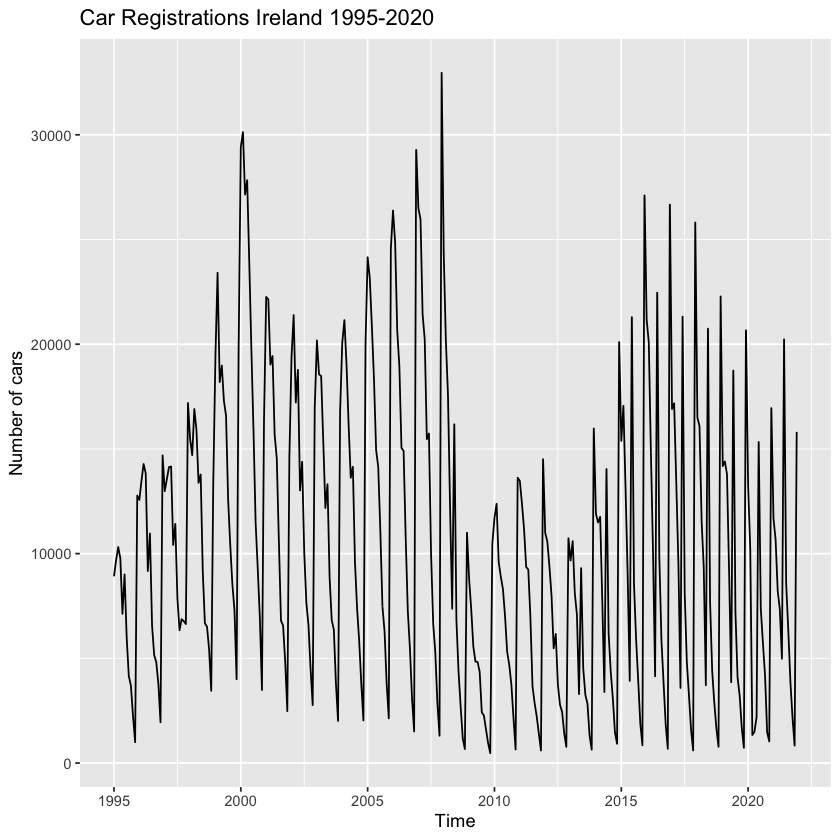

In [24]:
#Plot of the time series data
autoplot(ts_carreg, ylab= "Number of cars", main='Car Registrations Ireland 1995-2020')

In [173]:
cycle(ts_carreg)

Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1995  1   2   3   4   5   6   7   8   9  10  11  12 
1996  1   2   3   4   5   6   7   8   9  10  11  12 
1997  1   2   3   4   5   6   7   8   9  10  11  12 
1998  1   2   3   4   5   6   7   8   9  10  11  12 
1999  1   2   3   4   5   6   7   8   9  10  11  12 
2000  1   2   3   4   5   6   7   8   9  10  11  12 
2001  1   2   3   4   5   6   7   8   9  10  11  12 
2002  1   2   3   4   5   6   7   8   9  10  11  12 
2003  1   2   3   4   5   6   7   8   9  10  11  12 
2004  1   2   3   4   5   6   7   8   9  10  11  12 
2005  1   2   3   4   5   6   7   8   9  10  11  12 
2006  1   2   3   4   5   6   7   8   9  10  11  12 
2007  1   2   3   4   5   6   7   8   9  10  11  12 
2008  1   2   3   4   5   6   7   8   9  10  11  12 
2009  1   2   3   4   5   6   7   8   9  10  11  12 
2010  1   2   3   4   5   6   7   8   9  10  11  12 
2011  1   2   3   4   5   6   7   8   9  10  11  12 
2012  1   2   3   4   5   6   7   8   9  10  11  12 
2013  1   2   3   4   5   6   7   8   9  10  11  12 
2014  1   2   3   4   5   6   7   8   9  10  11  12 
2015  1   2   3   4   5   6   7   8   9  10  11  12 
2016  1   2   3   4   5   6   7   8   9  10  11  12 
2017  1   2   3   4   5   6   7   8   9  10  11  12 
2018  1   2   3   4   5   6   7   8   9  10  11  12 
2019  1   2   3   4   5   6   7   8   9  10  11  12 
2020  1   2   3   4   5   6   7   8   9  10  11  12 
2021  1   2   3   4   5   6   7   8   9  10  11  12

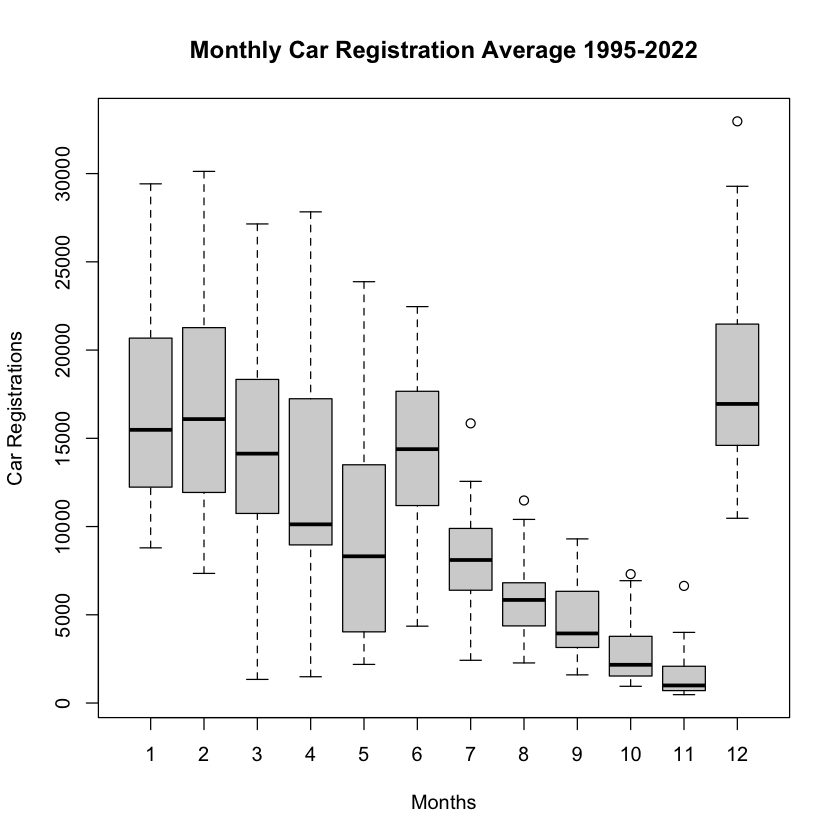

In [218]:
# check cycle 
#Boxplot of monthly car registrations 1995-2022
boxplot(ts_carreg ~ cycle(ts_carreg), main='Monthly Car Registration Average 1995-2022', ylab='Car Registrations',
       xlab='Months')

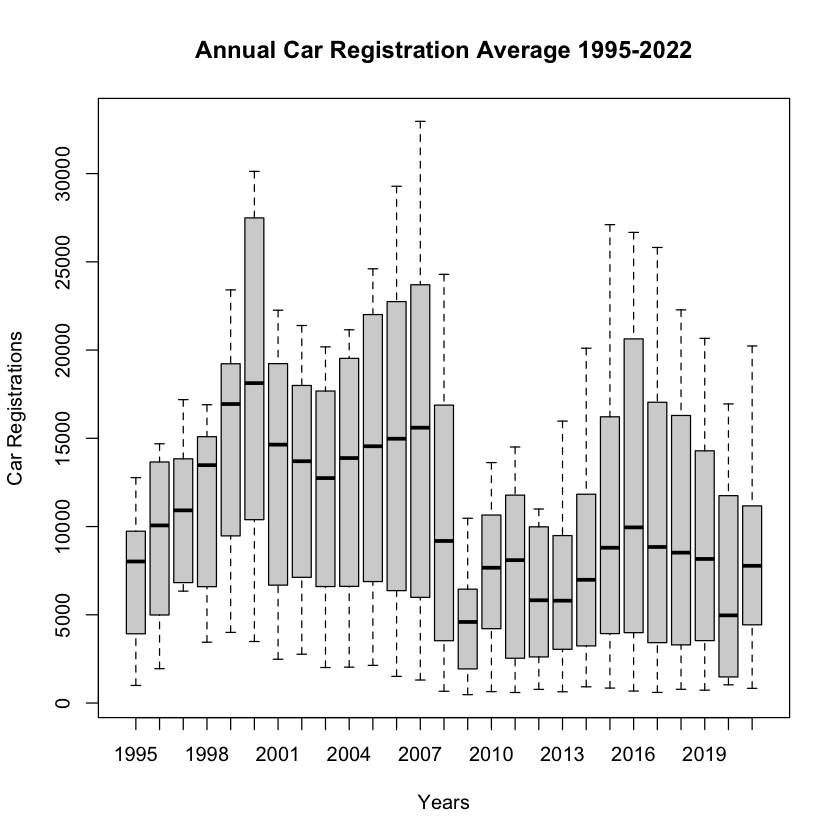

In [220]:
# check trend
#Boxplot of Annual Car Registrations 1995-2022
boxplot(ts_carreg ~ floor(time(ts_carreg)), main='Annual Car Registration Average 1995-2022', ylab='Car Registrations',
       xlab='Years')

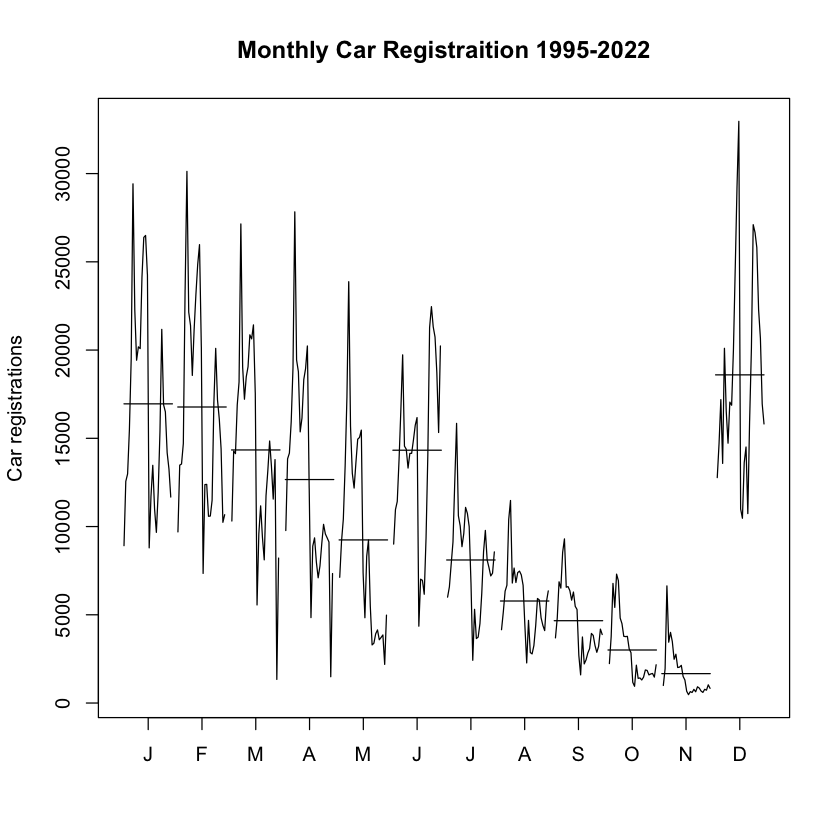

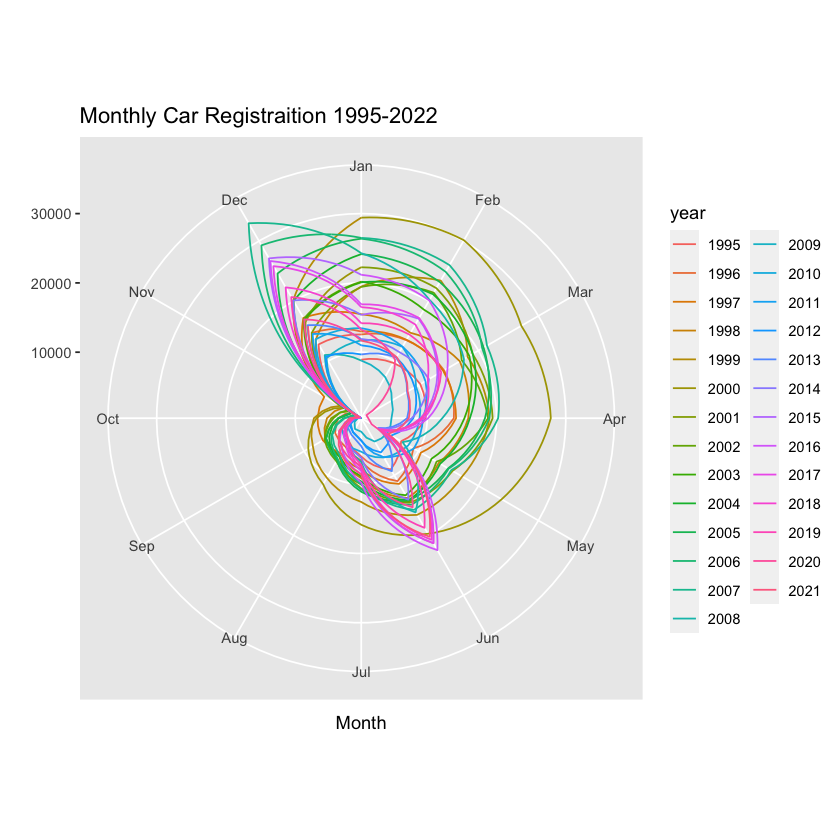

In [231]:
#Plot to check seasonality of Car Registrations 
monthplot(ts_carreg, main='Monthly Car Registraition 1995-2022', ylab='Car registrations')
#Plot spiderweb graph
ggseasonplot(ts_carreg, polar = T, main='Monthly Car Registraition 1995-2022 ',)

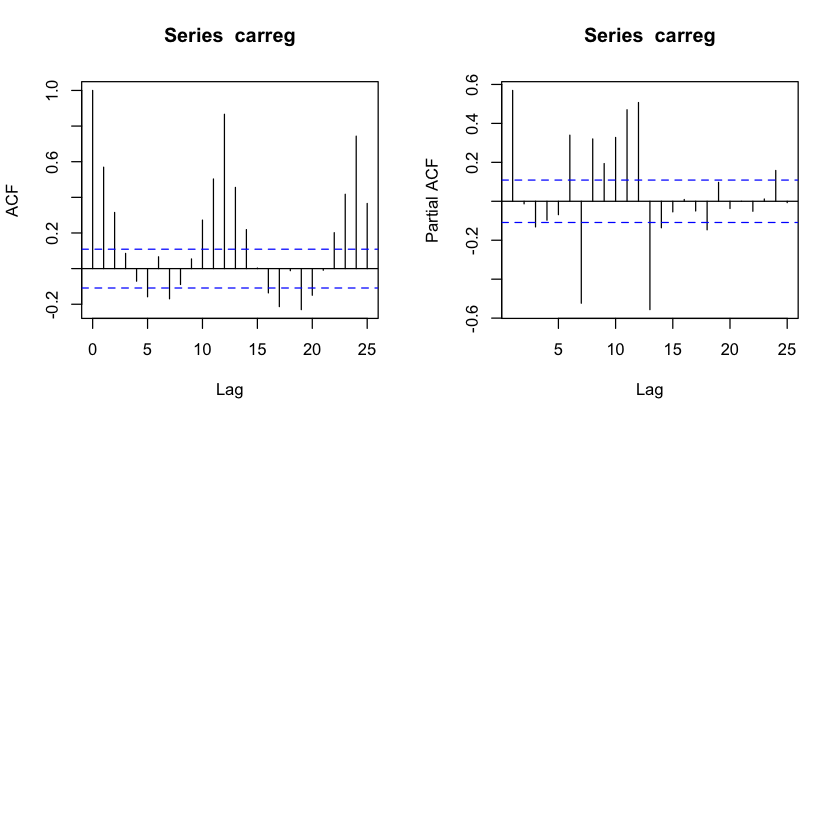

In [224]:
#Plot ACF graphs 
par(mfrow= c(2,2))
acf(carreg)
pacf(carreg)

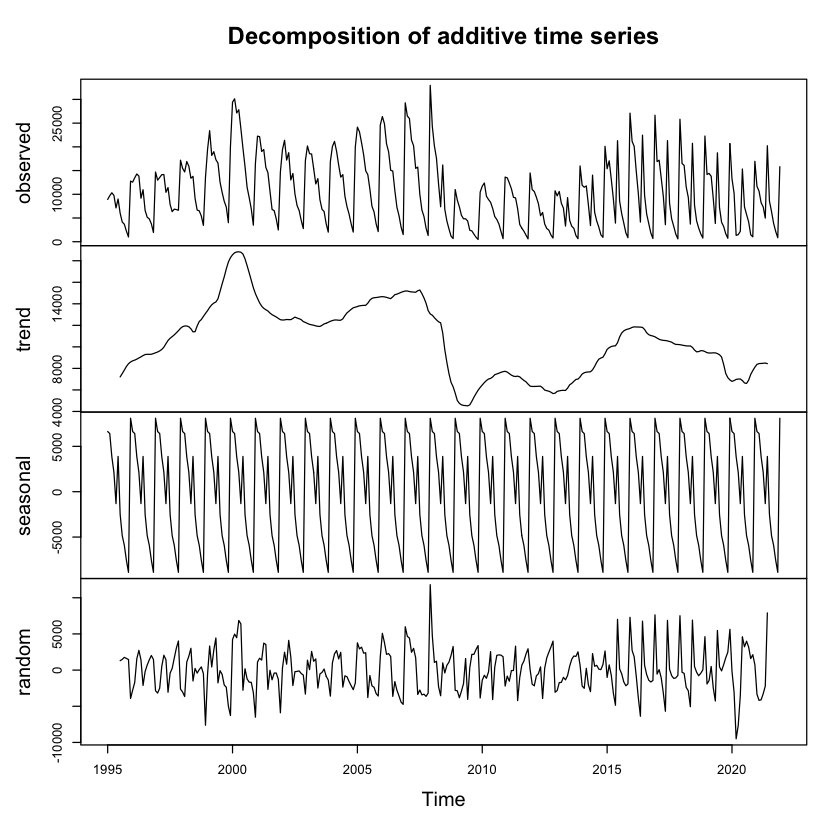

In [247]:
#Plot decomposed time series to show, observed, trend, seasonal and random plots.
plot(decompose(ts_carreg, 'additive'))

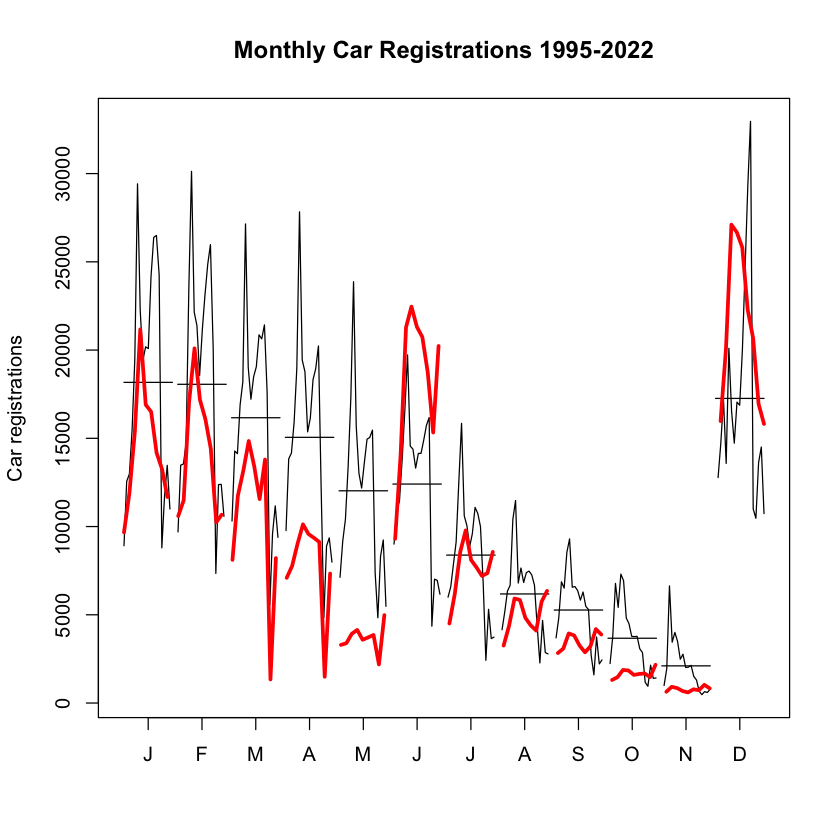

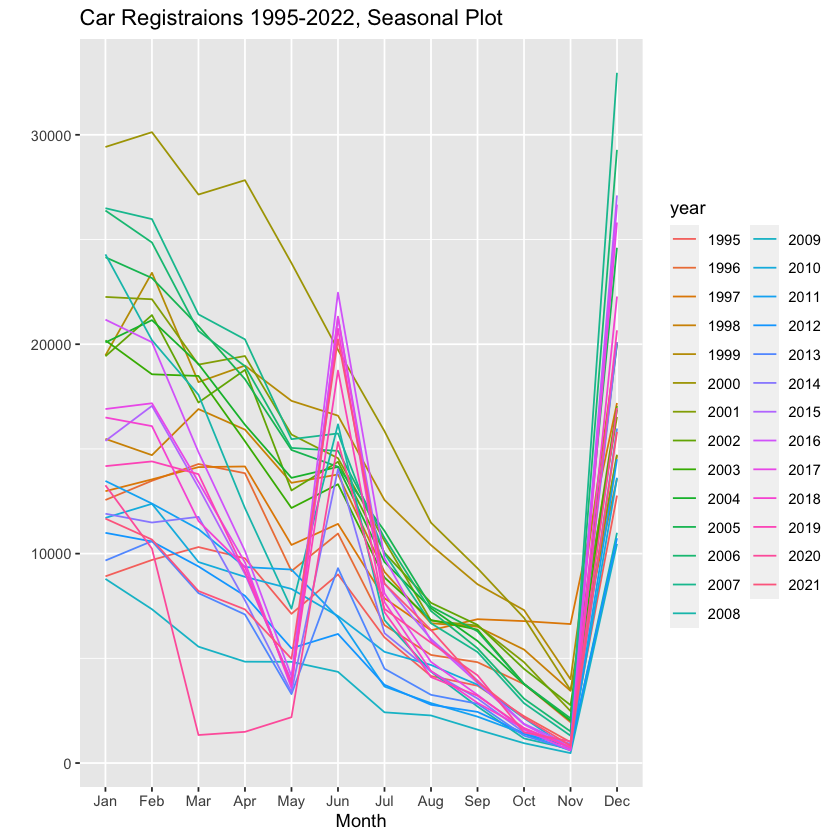

In [242]:
#Plot to show how trend in Car Registrations changes when 13.2 plates introduced 
ts_carreg_solo <- window(ts_carreg, start = c(1995,1), frequency = 12, end = c(2012, 12))
ts_carreg_double <- window(ts_carreg, start = c(2013,1), frequency = 12, end = c(2021, 12))

monthplot(ts_carreg_solo, main='Monthly Car Registrations 1995-2022', ylab ='Car registrations' )
monthplot(ts_carreg_double, add = T, lwd = 3, col = 'red') # doesn't seem to have "add" as a parameter 
ggseasonplot(ts_carreg, polar = F, main="Car Registraions 1995-2022, Seasonal Plot")

In [23]:
# does the model need differentiating?
ndiffs(ts_carreg)

[1] 1

In [254]:
lcarreg <- log(ts_carreg)

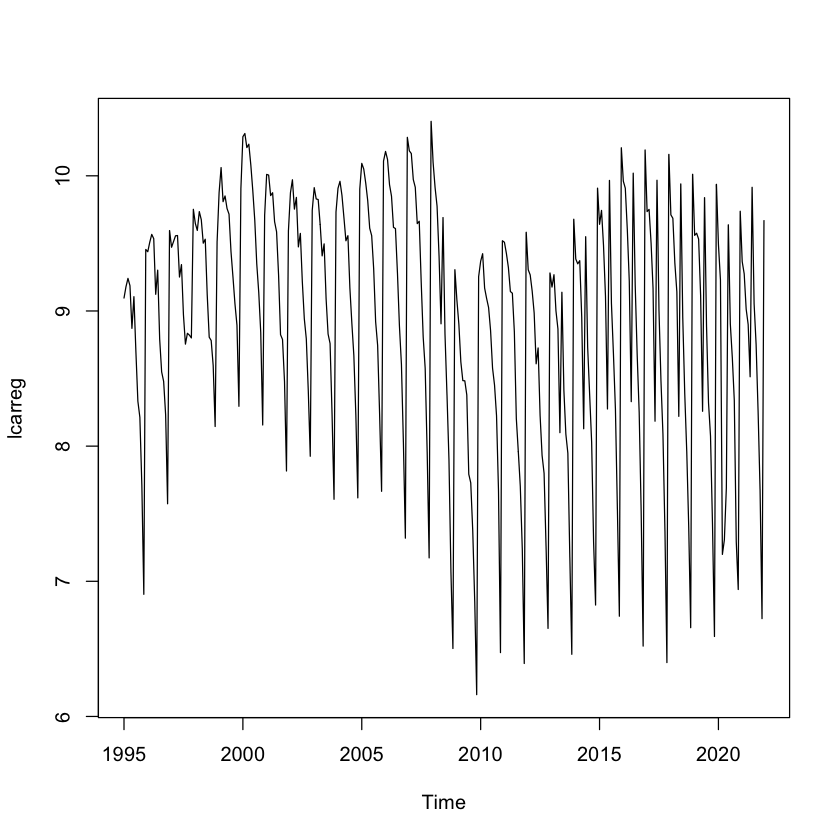

In [255]:
plot(lcarreg)

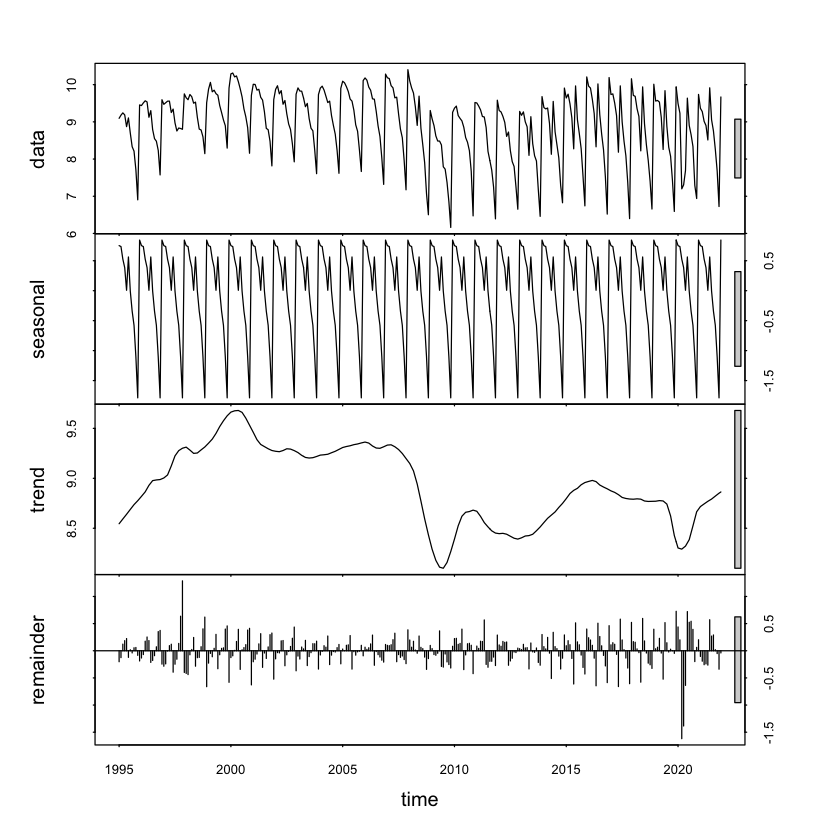

In [256]:
lfit <- stl(lcarreg, s.window='period')
plot(lfit)

In [257]:
summary(lfit)

 Call:
 stl(x = lcarreg, s.window = "period")

 Time.series components:
    seasonal              trend            remainder         
 Min.   :-1.7880255   Min.   :8.099569   Min.   :-1.6186900  
 1st Qu.:-0.3999043   1st Qu.:8.646717   1st Qu.:-0.1493199  
 Median : 0.1964685   Median :8.895802   Median : 0.0185804  
 Mean   : 0.0000000   Mean   :8.933566   Mean   : 0.0002335  
 3rd Qu.: 0.6063886   3rd Qu.:9.283058   3rd Qu.: 0.1554087  
 Max.   : 0.8449677   Max.   :9.679165   Max.   : 1.2872474  
 IQR:
     STL.seasonal STL.trend STL.remainder data  
     1.0063       0.6363    0.3047        1.2730
   %  79.0         50.0      23.9         100.0 

 Weights: all == 1

 Other components: List of 5
 $ win  : Named num [1:3] 3241 19 13
 $ deg  : Named int [1:3] 0 1 1
 $ jump : Named num [1:3] 325 2 2
 $ inner: int 2
 $ outer: int 0


In [253]:
dcarreg <- diff(ts_carreg)
sdcarreg <- sdiff(ts_carreg)

ERROR: Error in sdiff(ts_carreg): could not find function "sdiff"


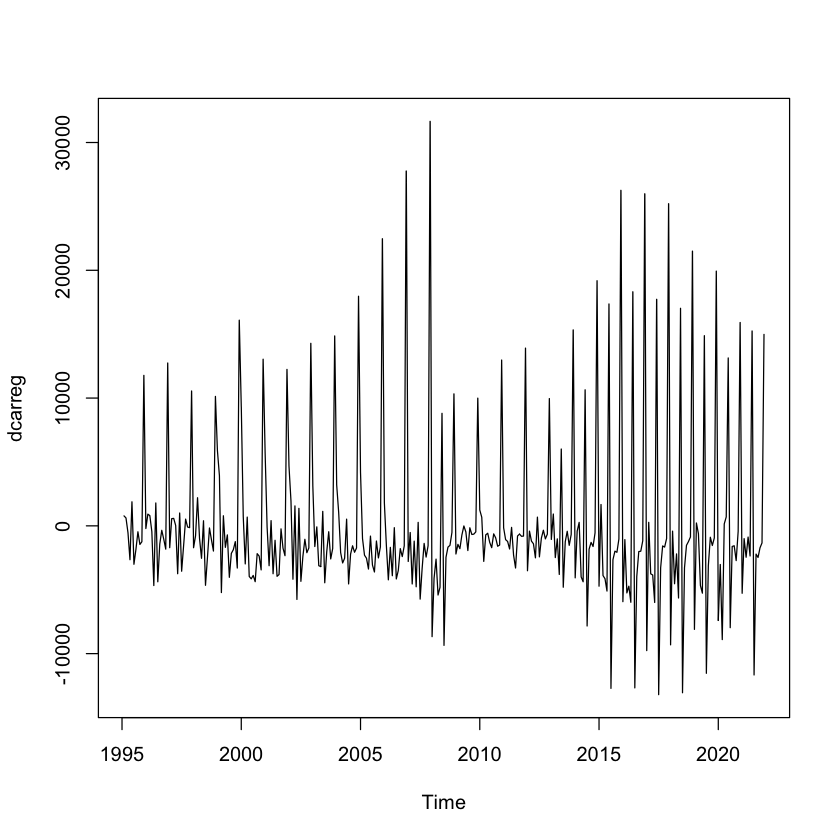

In [25]:
plot(dcarreg)

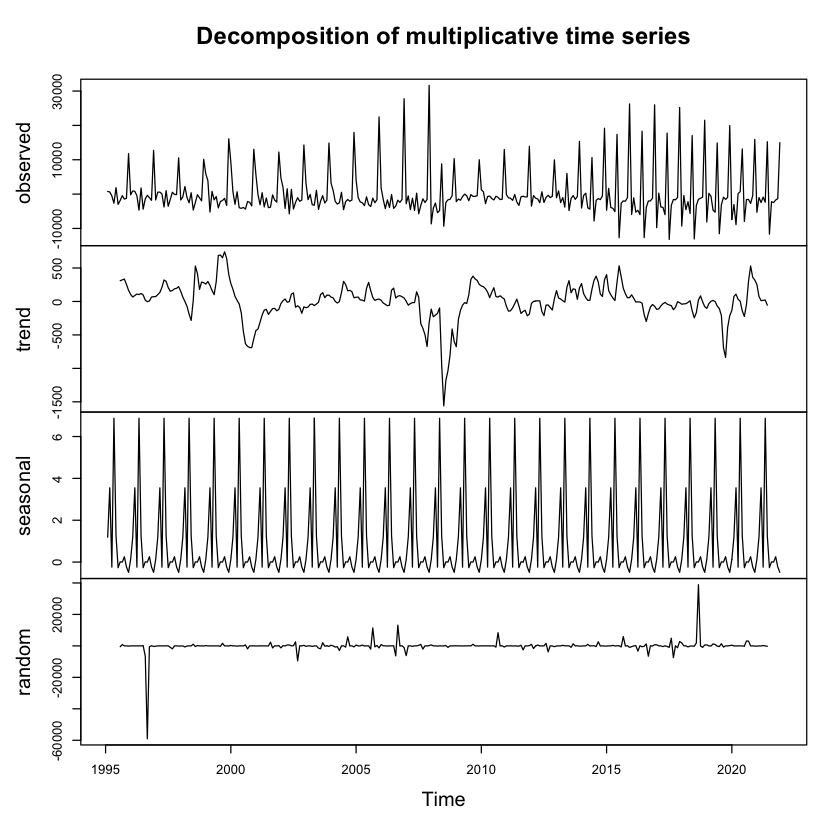

In [103]:
#Broken down plot of the Time series data
plot(decompose(dcarreg, 'multiplicative'))

In [102]:
#assess the stationarity of the carreg time series data
#Augmented Dickey-Fuller Test
adf.test(dcarreg)


	Augmented Dickey-Fuller Test

data:  dcarreg
Dickey-Fuller = -11.748, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


In [40]:
# find candidate ts for : 
# split data into train/test 80/20
years <- end(ts_carreg)[1] - start(ts_carreg)[1] # get the number of years of the time series 
years

[1] 26

# Train Test Split

In [25]:
#Split data into train and test sets
train <- window(ts_carreg, start = c(1995,1), frequency = 12, end= c(2016, 12) ) # set to 80% of the series, also includes 4 years of 
test <- window(ts_carreg, start = c(2017,1), frequency = 12, end= c(2021, 12) ) # set to latest 20% of the series

In [26]:
str(train)
str(test)

 Time-Series [1:264] from 1995 to 2017: 8916 9697 10314 9775 7125 9007 6000 4155 3692 2236 ...
 Time-Series [1:60] from 2017 to 2022: 16905 17180 13427 9581 3585 21316 8105 4828 3255 1594 ...


# Simple seasonal naive time series model

function () 
{
    for (fun in getHook("before.plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    .External2(C_plot_new)
    grDevices:::recordPalette()
    for (fun in getHook("plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    invisible()
}
<bytecode: 0x112d74ee0>
<environment: namespace:graphics>

ERROR: Error in accuracy(forecast(snaive_fit)): argument "predicted" is missing, with no default


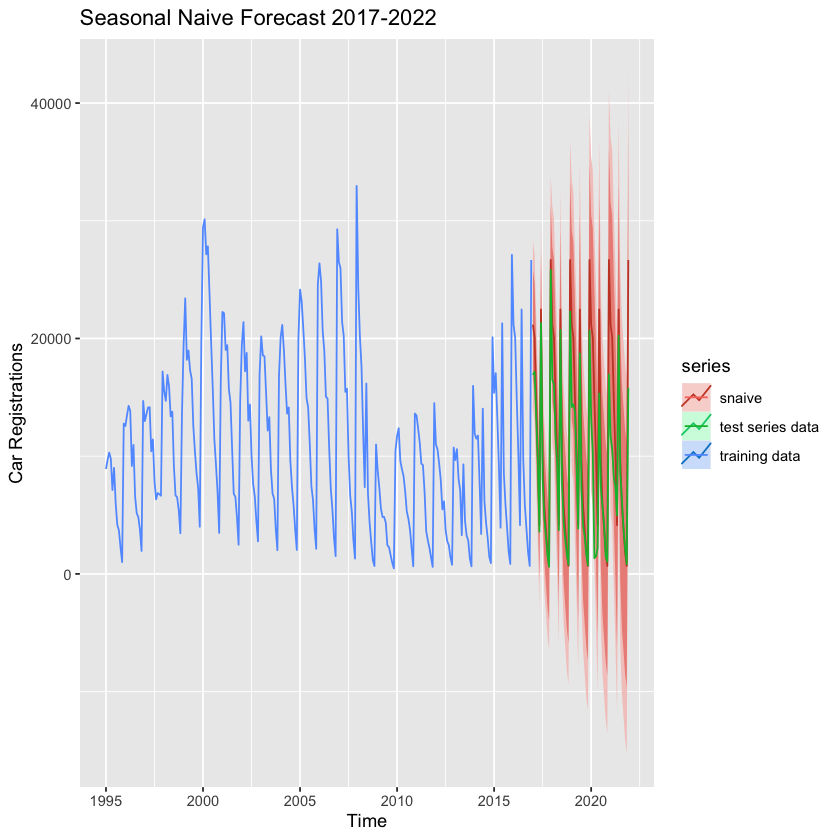

In [30]:
#iii simple ts models 
#seasonal naive method 
snaive_fit <- snaive(train, h = 60)
plot.new
autoplot(train, series = "training data", main='Seasonal Naive Forecast 2017-2022', ylab='Car Registrations') +
  autolayer(snaive_fit, series= "snaive") + # PI=F removes the range on the predicted series 
  autolayer(test, series = "test series data")
accuracy(forecast(snaive_fit))

In [28]:
summary(snaive_fit)


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = train, h = 60) 

Residual sd: 3628.8288 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE MASE      ACF1
Training set 225.4246 3628.829 2309.107 -5.178308 26.38054    1 0.7288969

Forecasts:
         Point Forecast      Lo 80     Hi 80        Lo 95     Hi 95
Jan 2017          21173 16522.4688 25823.531  14060.62633 28285.374
Feb 2017          20096 15445.4688 24746.531  12983.62633 27208.374
Mar 2017          14847 10196.4688 19497.531   7734.62633 21959.374
Apr 2017          10125  5474.4688 14775.531   3012.62633 17237.374
May 2017           4143  -507.5312  8793.531  -2969.37367 11255.374
Jun 2017          22462 17811.4688 27112.531  15349.62633 29574.374
Jul 2017           9781  5130.4688 14431.531   2668.62633 16893.374
Aug 2017           5842  1191.4688 10492.531  -1270.37367 12954.374
Sep 2017           3831  -819.5312  8481.531  -3281.37367 10943.374
Oct 2017           1846 -

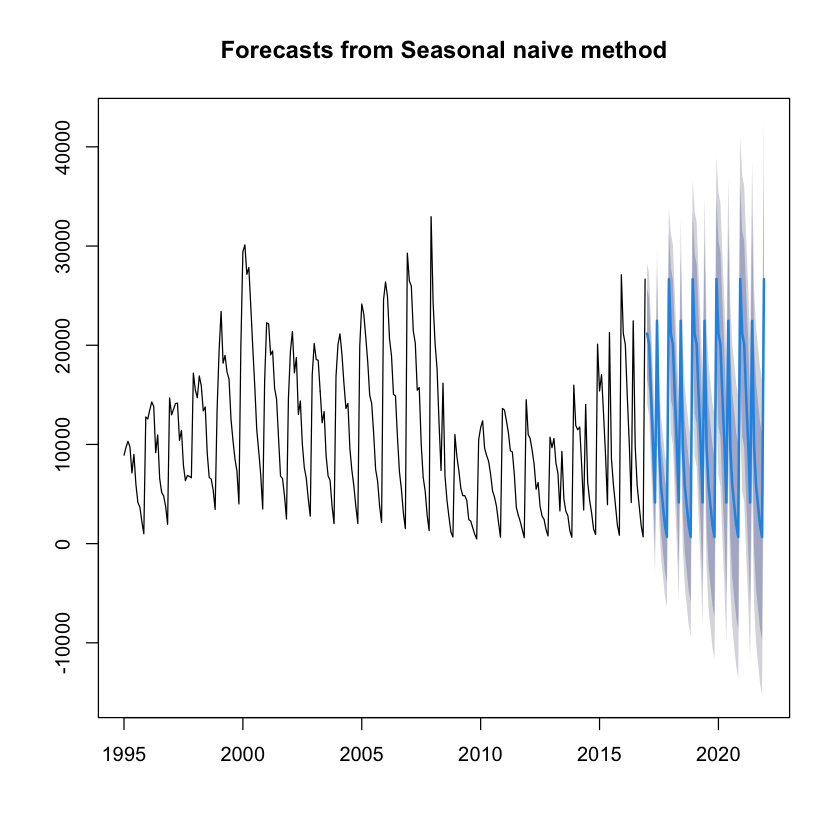

In [154]:
plot(snaive_fit)

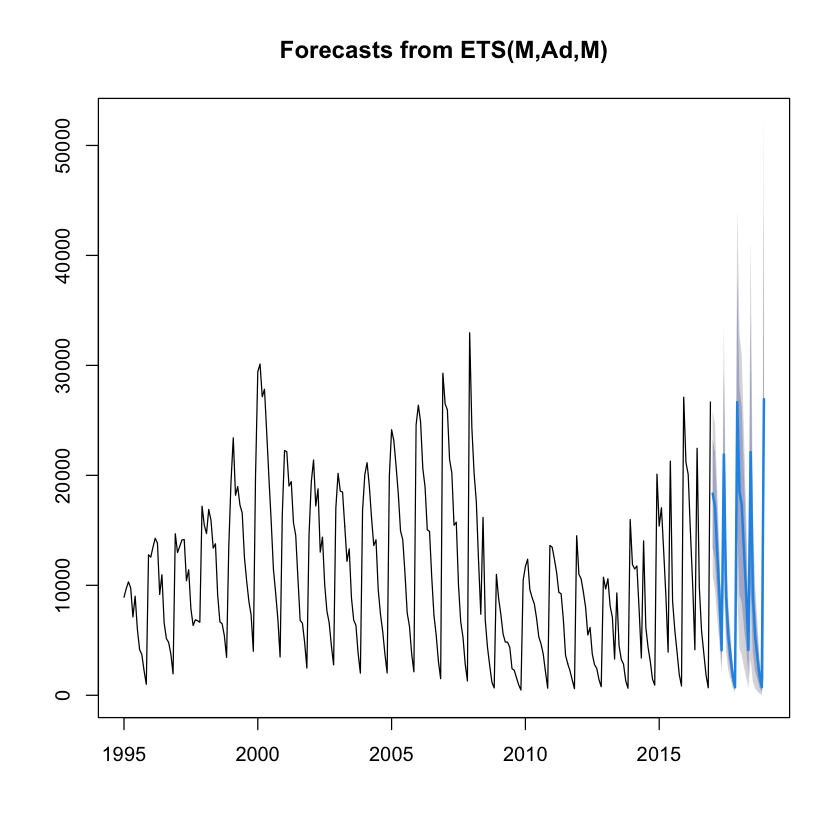

In [327]:
plot(forecast(exp_fit)


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 507.85, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



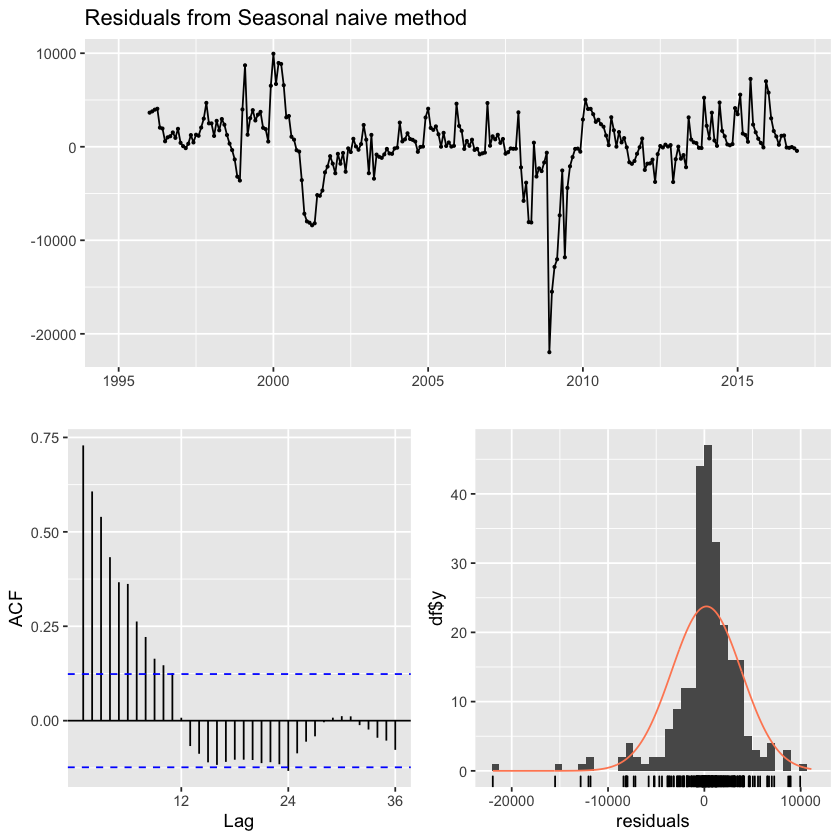

In [155]:
checkresiduals(snaive_fit)

# Exponential smoothing model

In [275]:
# i exp. smoothing /ETS models 
exp_fit <- ets(train, model = "ZZZ", ic = "aic") # ets(M,A,M)

## plot the model
autoplot(exp_fit)

In [271]:
summary(exp_fit)
#5422.715 AIC
#2368.48 RMSE

ETS(M,Ad,M) 

Call:
 ets(y = train, model = "ZZZ", ic = "aicc") 

  Smoothing parameters:
    alpha = 0.3588 
    beta  = 1e-04 
    gamma = 0.6059 
    phi   = 0.9759 

  Initial states:
    l = 5974.2096 
    b = 308.8147 
    s = 1.6757 0.9389 0.2982 0.4212 0.4864 0.6805
           1.0033 0.9098 1.3705 1.4027 1.4387 1.374

  sigma:  0.2092

     AIC     AICc      BIC 
5422.715 5425.507 5487.082 

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE     ACF1
Training set 32.89798 2368.48 1481.548 -6.591243 18.26923 0.6416106 0.312875

In [262]:
accuracy(exp_fit)

ERROR: Error in ce(actual, predicted): argument "predicted" is missing, with no default


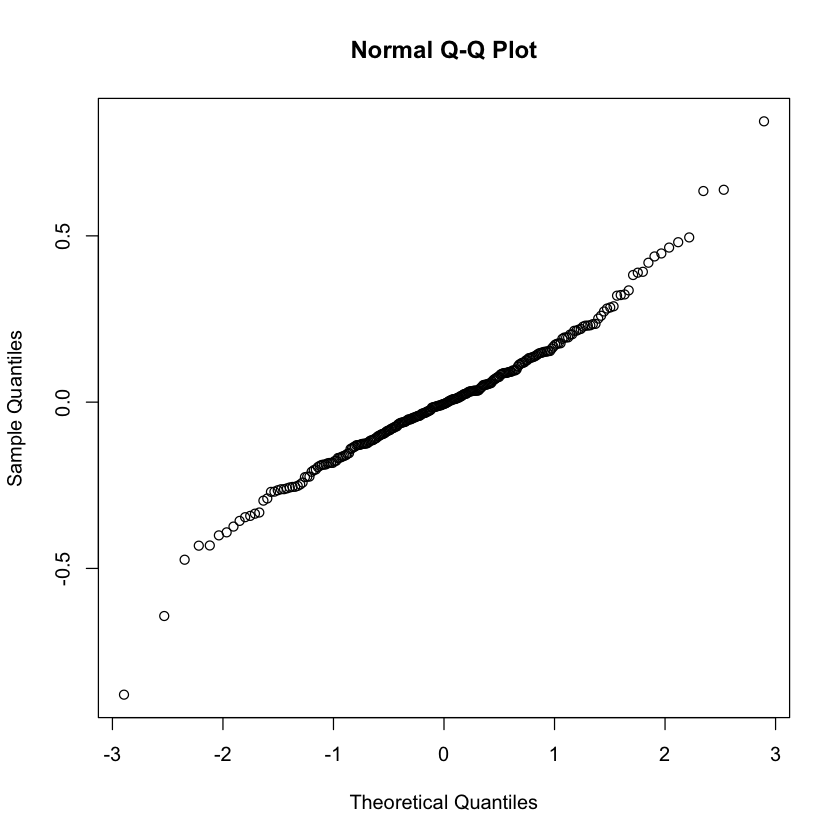

In [272]:
qqnorm(exp_fit$residuals)


	Ljung-Box test

data:  Residuals from ETS(M,Ad,M)
Q* = 62.662, df = 7, p-value = 4.431e-11

Model df: 17.   Total lags used: 24



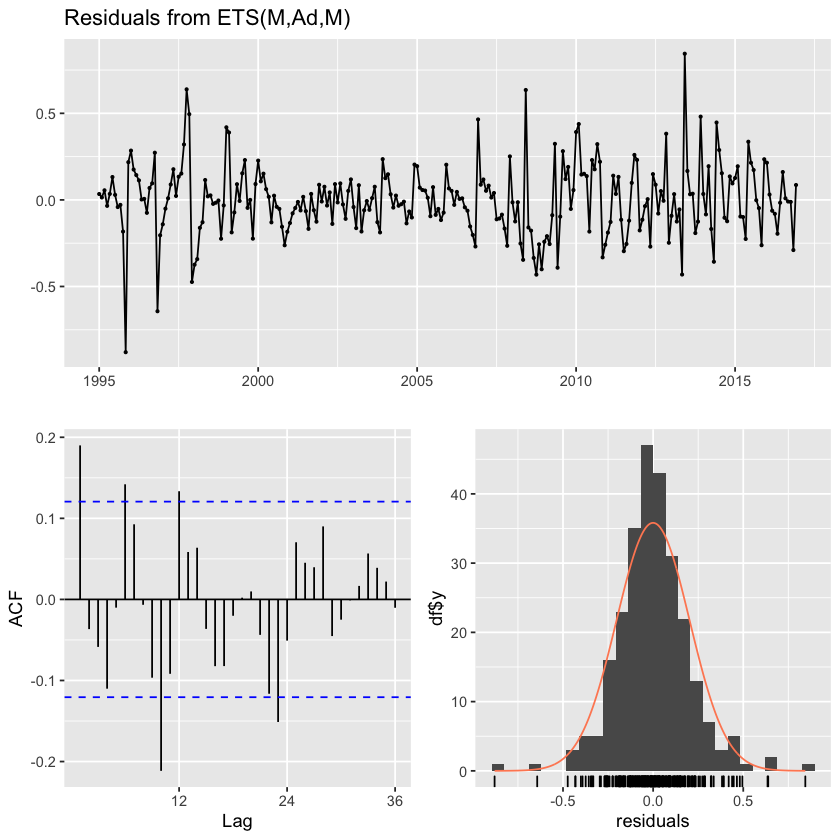

In [273]:
checkresiduals(exp_fit)

In [110]:
#Cross validation 
train%>% tsCV(forecastfunction=rwf, drift=TRUE, h=1) -> e
e^2%>%mean(na.rm=TRUE)%>%sqrt()

[1] 6141.182

function () 
{
    for (fun in getHook("before.plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    .External2(C_plot_new)
    grDevices:::recordPalette()
    for (fun in getHook("plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    invisible()
}
<bytecode: 0x7fa89cc940a8>
<environment: namespace:graphics>

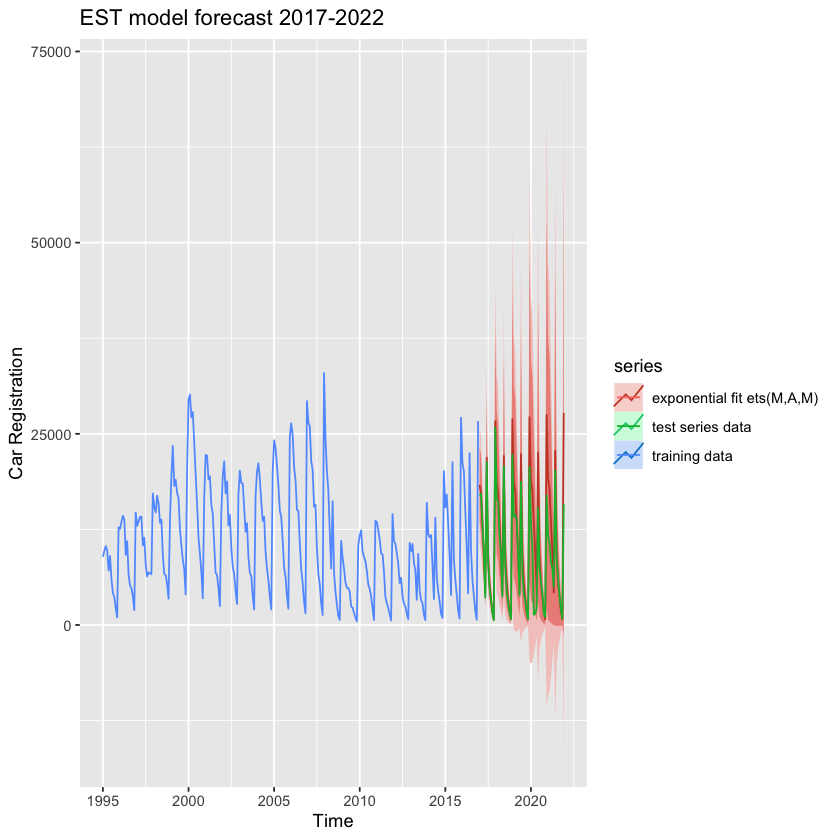

In [336]:
# check model plot over data
plot.new
autoplot(train, series = "training data", main='EST model forecast 2017-2022', ylab='Car Registration') +
  autolayer(forecast(exp_fit, h = 60), series= "exponential fit ets(M,A,M)") + # PI=F removes the range on the predicted series 
  autolayer(test, series = "test series data")


function () 
{
    for (fun in getHook("before.plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    .External2(C_plot_new)
    grDevices:::recordPalette()
    for (fun in getHook("plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    invisible()
}
<bytecode: 0x7fa89cc940a8>
<environment: namespace:graphics>

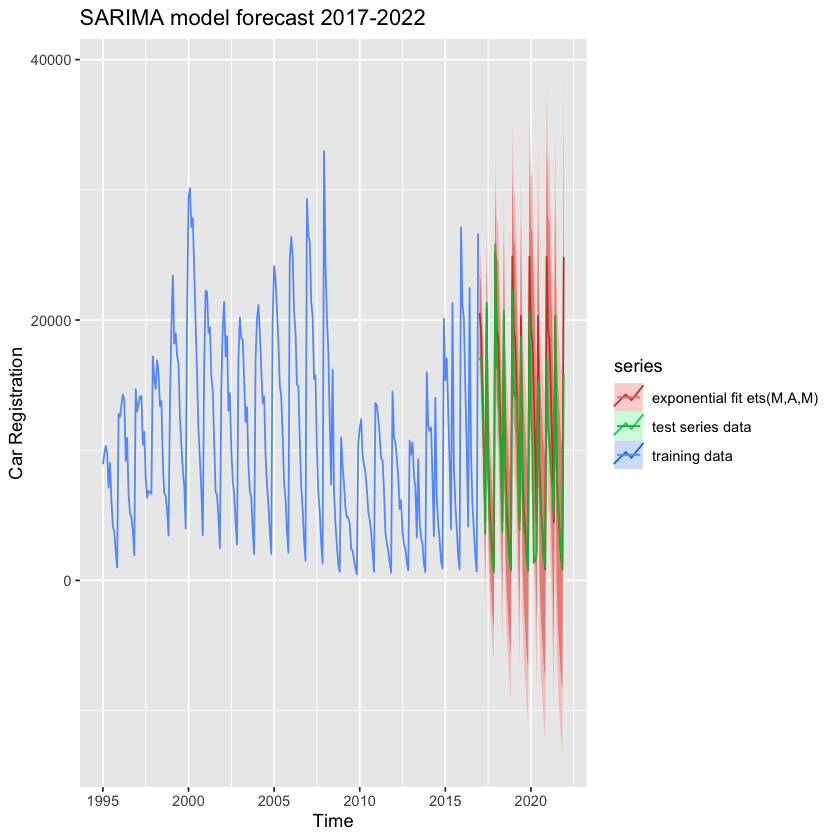

In [337]:
# check model plot over data
plot.new
autoplot(train, series = "training data", main='SARIMA model forecast 2017-2022', ylab='Car Registration') +
  autolayer(forecast(ar2, h = 60), series= "exponential fit ets(M,A,M)") + # PI=F removes the range on the predicted series 
  autolayer(test, series = "test series data")



function () 
{
    for (fun in getHook("before.plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    .External2(C_plot_new)
    grDevices:::recordPalette()
    for (fun in getHook("plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    invisible()
}
<bytecode: 0x7fa89cc940a8>
<environment: namespace:graphics>

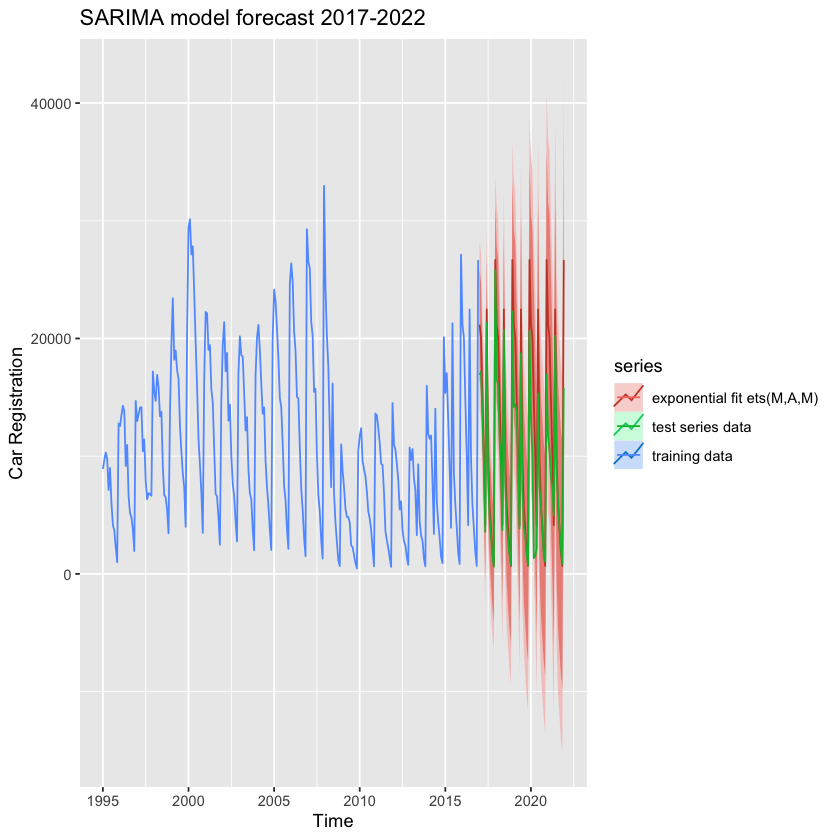

In [338]:
plot.new
autoplot(train, series = "training data", main='SARIMA model forecast 2017-2022', ylab='Car Registration') +
  autolayer(forecast(snaive_fit, h = 60), series= "exponential fit ets(M,A,M)") + # PI=F removes the range on the predicted series 
  autolayer(test, series = "test series data")



# Holt-Winters Seasonal Method

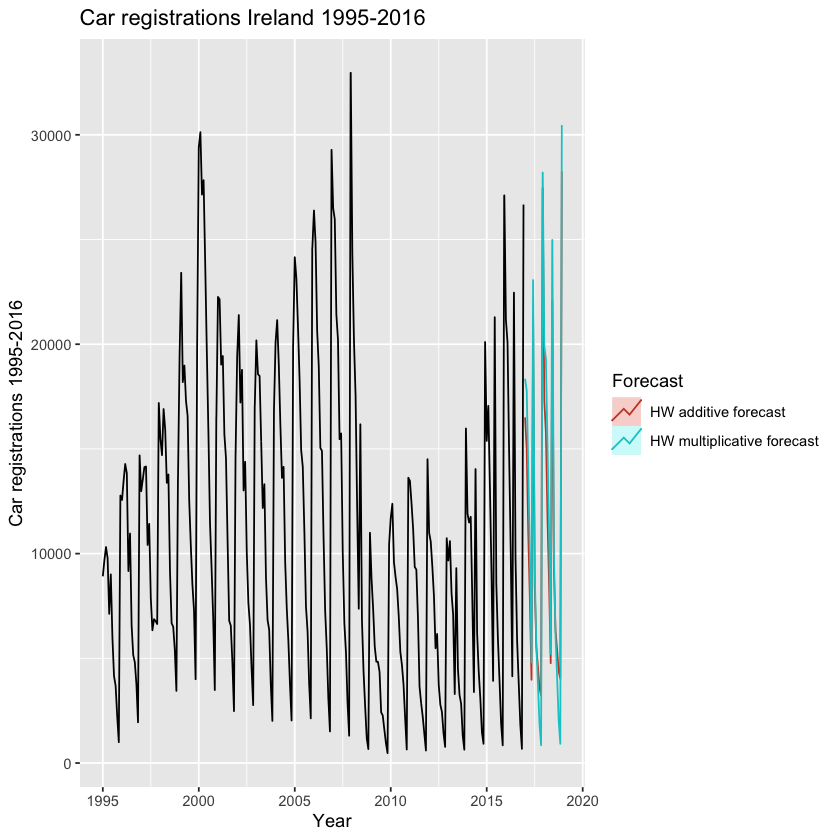

In [213]:
hwsa <- hw(train, seasonal='additive')
hwsm <- hw(train, seasonal='multiplicative')
autoplot(train)+
    autolayer(hwsa, series='HW additive forecast', PI=FALSE)+
    autolayer(hwsm, series='HW multiplicative forecast', PI=FALSE)+
    xlab('Year')+
    ylab('Car registrations 1995-2016')+
    ggtitle('Car registrations Ireland 1995-2016')+
    guides(colour=guide_legend(title='Forecast'))


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 130.93, df = 8, p-value < 2.2e-16

Model df: 16.   Total lags used: 24



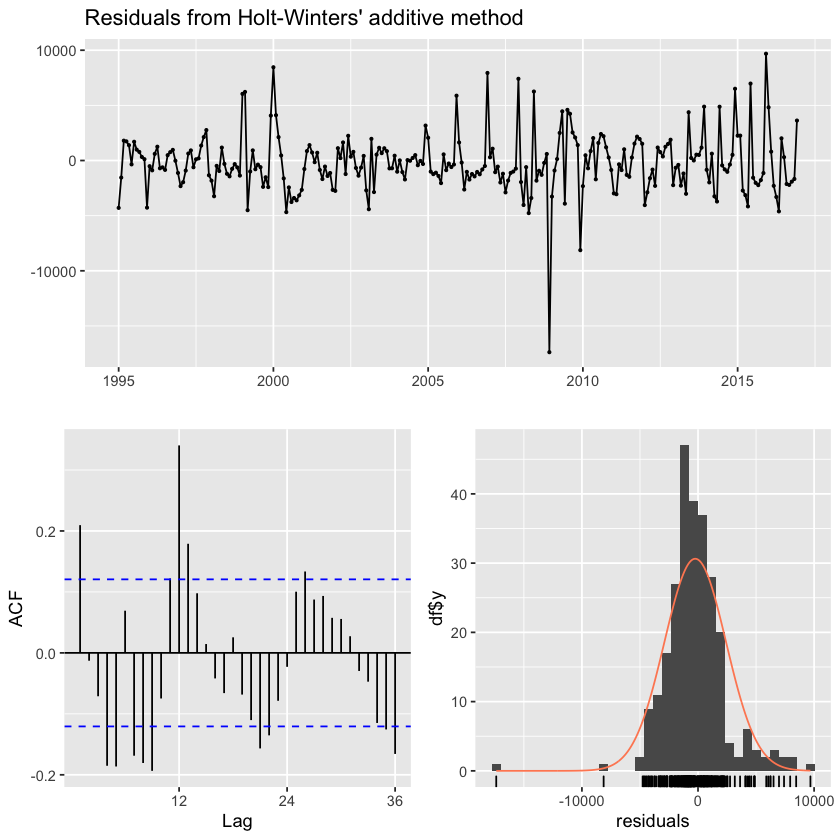


	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 45.856, df = 8, p-value = 2.531e-07

Model df: 16.   Total lags used: 24



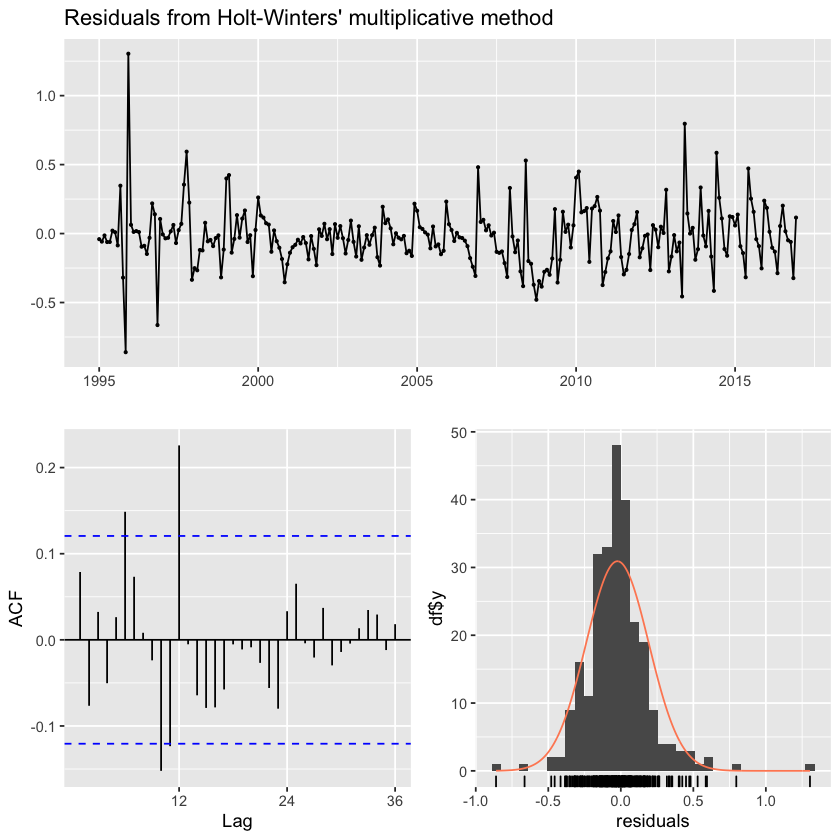

In [214]:
checkresiduals(hwsa)
checkresiduals(hwsm)

# ARIMA /SARIMA models

In [32]:
#check ndiffs again for train (should be: d = 1, D =1) :D
ndiffs(train) # find the no. of ordinary differences to use = 1 
nsdiffs(train) # find the no. of seasonal differences to use = 1 

[1] 1

[1] 1

In [33]:
d_train <- diff(train)

In [34]:
#simple time series model
ts_train <- ts(train, start =c(1995,1), frequency = 12)

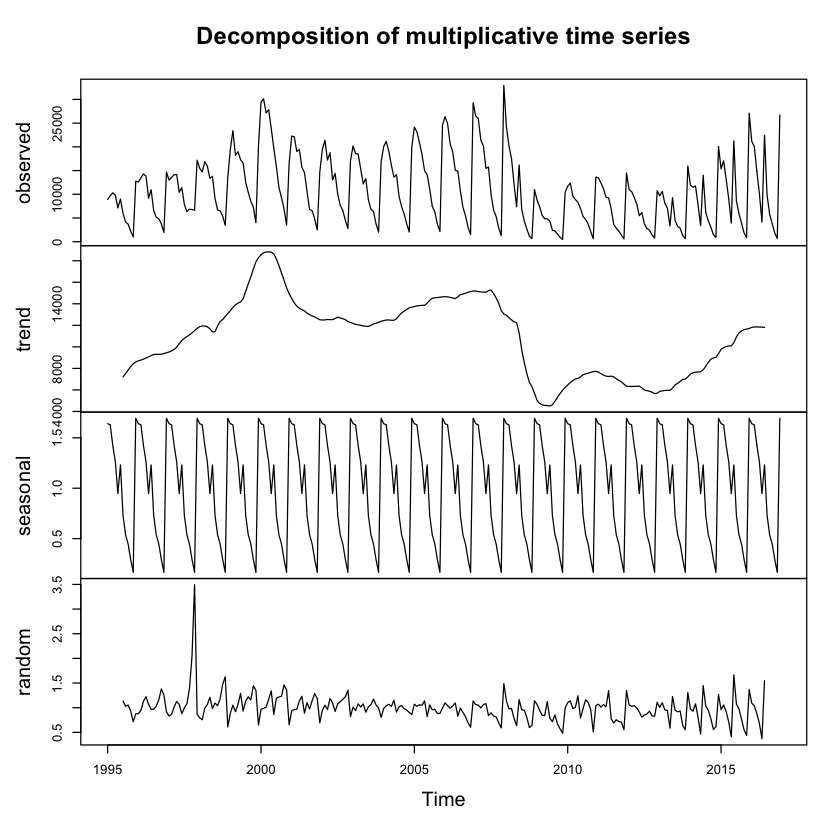

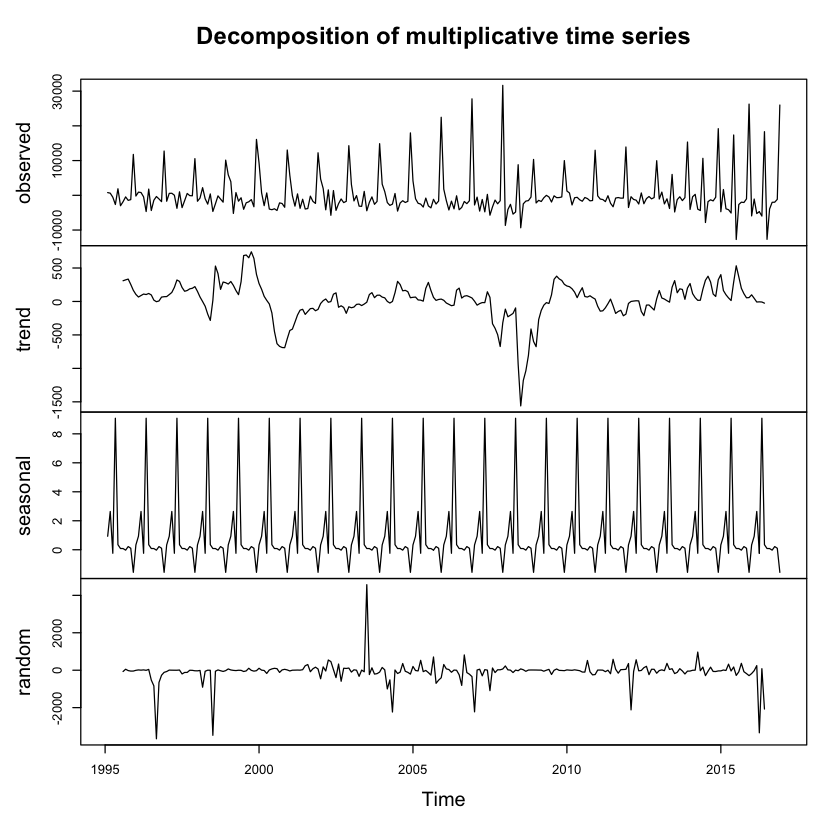

In [35]:
plot(decompose(ts_train, 'multiplicative'))
plot(decompose(d_train, 'multiplicative'))

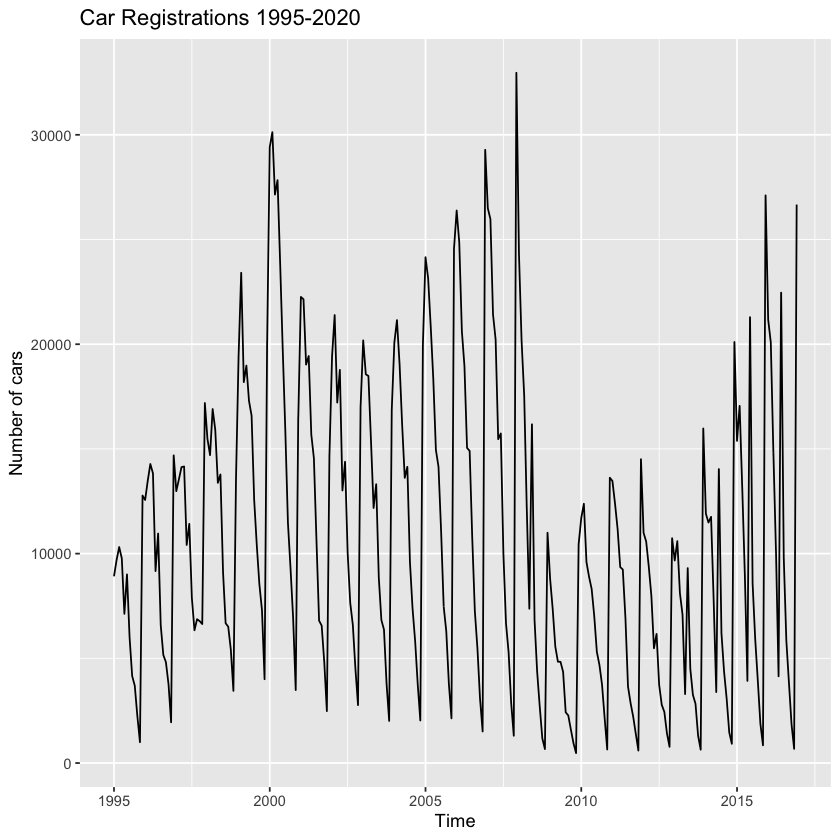

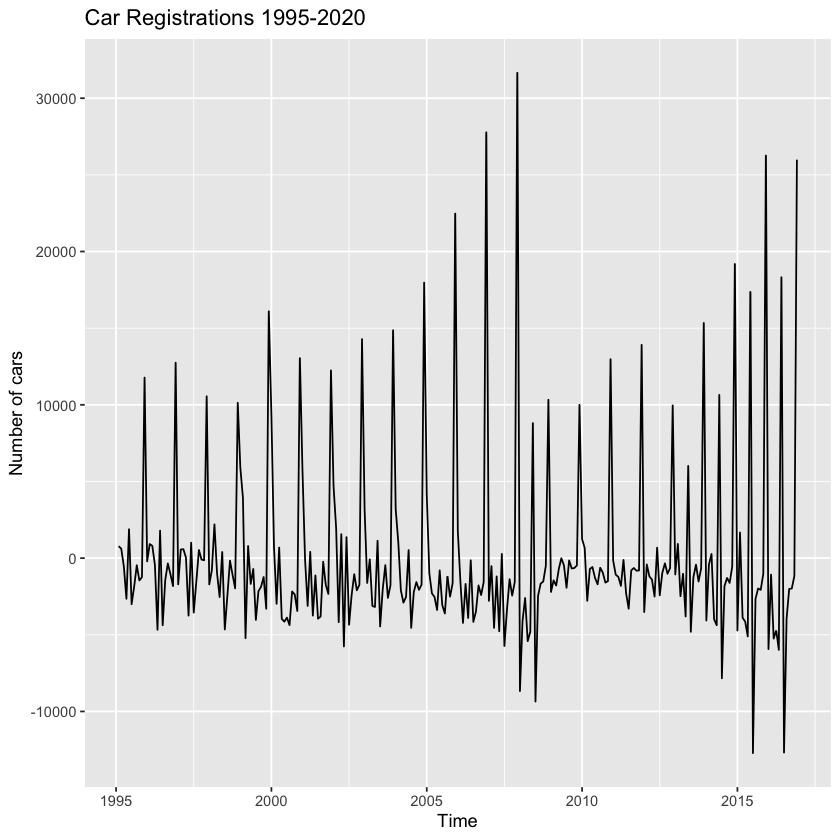

In [36]:
par(mfrow= c(1,1))
autoplot(ts_train, ylab= "Number of cars", main='Car Registrations 1995-2020')
autoplot(d_train, ylab= "Number of cars", main='Car Registrations 1995-2020')

In [37]:
#assess stability using Aug Dickey-Fuller test
adf.test(d_train) #stationary

Warning message in adf.test(d_train):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  d_train
Dickey-Fuller = -10.927, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


In [38]:
adf.test(train) #stationary

Warning message in adf.test(train):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  train
Dickey-Fuller = -7.9523, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


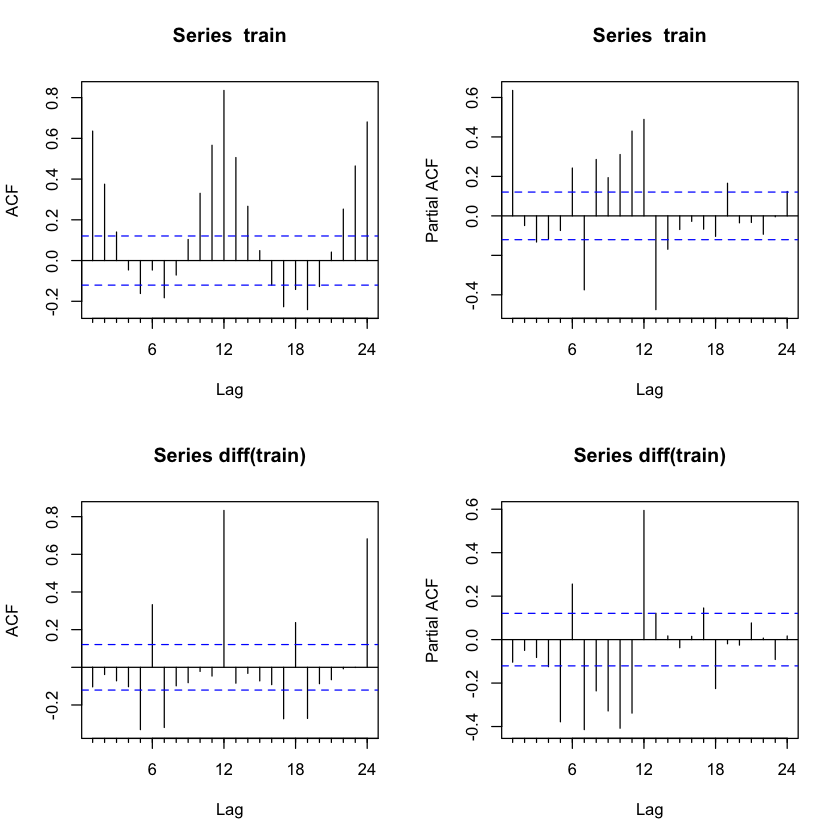

In [39]:
#ACF / PACF
#CHOOSING P AND Q
par(mfrow= c(2,2))
Acf(train)
Pacf(train)
Acf(d_train, main = "Series diff(train)")
Pacf(d_train, main = "Series diff(train)")

In [310]:
aarima_fit_nostep <- auto.arima(train, stepwise = F , ic = "aicc")
aarima_fit_nostep2 <- auto.arima(log(train), stepwise = F , ic = "aicc")
#with 1 level of differencing 
aarima_fitd <- auto.arima(train, d =1, ic = "aic")

In [43]:
ar2 <- auto.arima(train, stepwise = FALSE, ic = "aicc", d = 1)

In [31]:
ar2 <- auto.arima(train, stepwise = F , ic = "aicc", d=1a)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:57: unexpected symbol
1: ar2 <- auto.arima(train, stepwise = F , ic = "aicc", d=1a
                                                            ^


In [320]:
summary(ar2)

Series: train 
ARIMA(1,0,1)(0,1,2)[12] 

Coefficients:
         ar1      ma1     sma1     sma2
      0.8540  -0.2695  -0.1198  -0.1818
s.e.  0.0446   0.0850   0.0681   0.0781

sigma^2 = 5820739:  log likelihood = -2319.19
AIC=4648.38   AICc=4648.63   BIC=4666.03

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 48.61346 2338.368 1342.614 -0.5019952 16.80925 0.5814427
                   ACF1
Training set 0.01062882

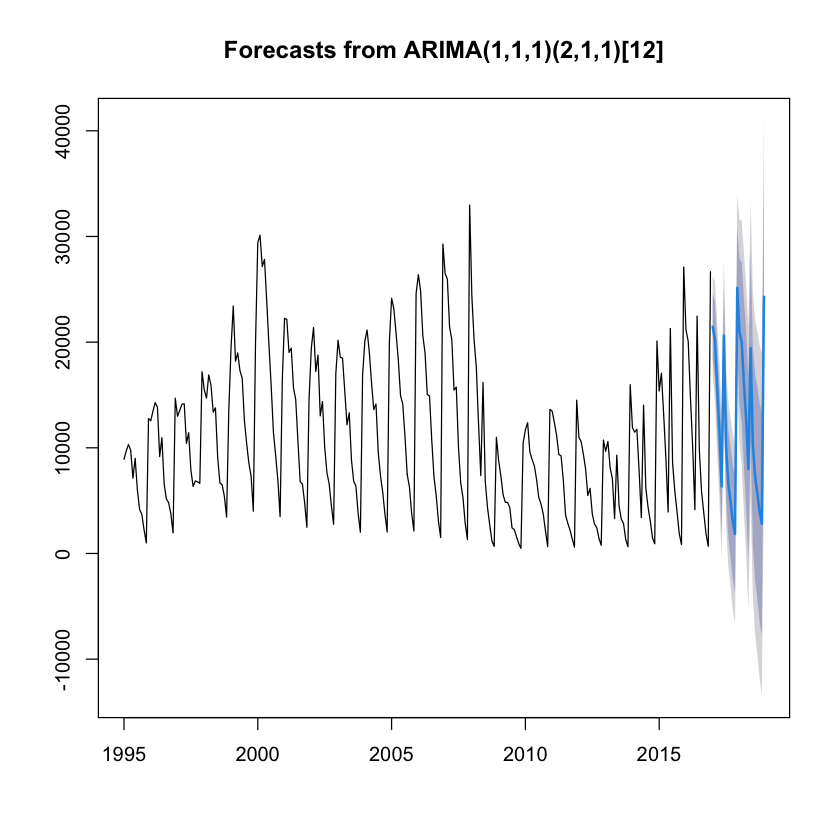

In [44]:
plot(forecast(ar2))


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(0,1,2)[12]
Q* = 28.871, df = 20, p-value = 0.09032

Model df: 4.   Total lags used: 24



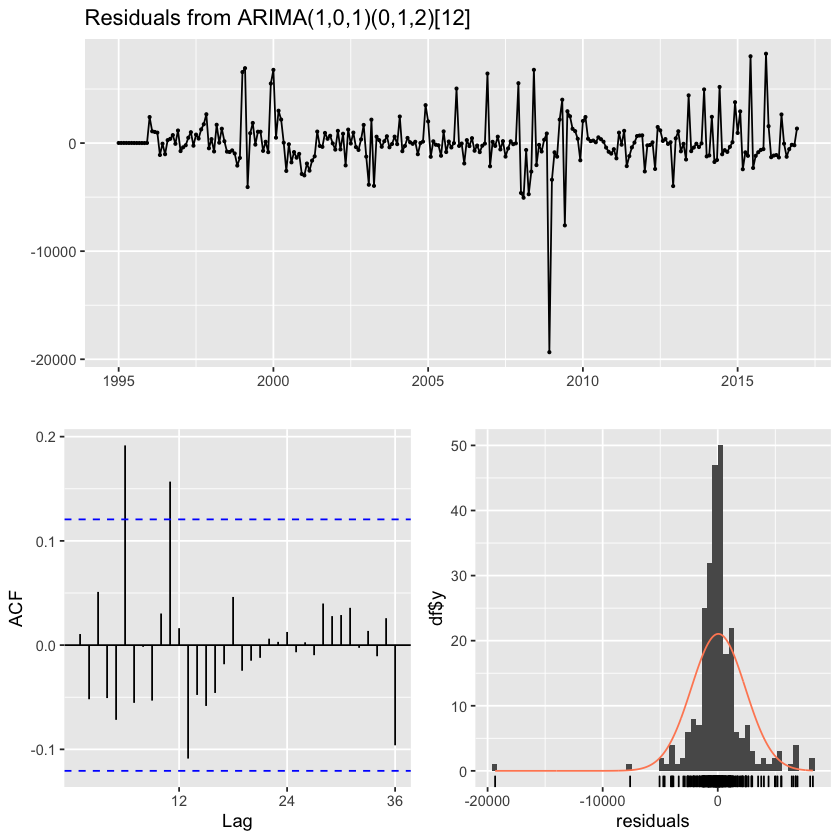

In [319]:
checkresiduals(ar2)

In [314]:
ar1 <- auto.arima(train, stepwise = F , ic = "aicc", D=1, d=1)

In [315]:
summary(ar1)

Series: train 
ARIMA(1,1,1)(2,1,1)[12] 

Coefficients:
         ar1      ma1    sar1     sar2     sma1
      0.3826  -0.7316  0.6831  -0.1008  -0.8655
s.e.  0.1797   0.1451  0.0918   0.0716   0.0772

sigma^2 = 5799847:  log likelihood = -2310.85
AIC=4633.7   AICc=4634.04   BIC=4654.85

Training set error measures:
                    ME     RMSE      MAE     MPE    MAPE      MASE        ACF1
Training set -64.23853 2324.737 1460.044 1.63749 22.4403 0.6322982 -0.01316659


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(2,1,1)[12]
Q* = 33.299, df = 19, p-value = 0.0222

Model df: 5.   Total lags used: 24



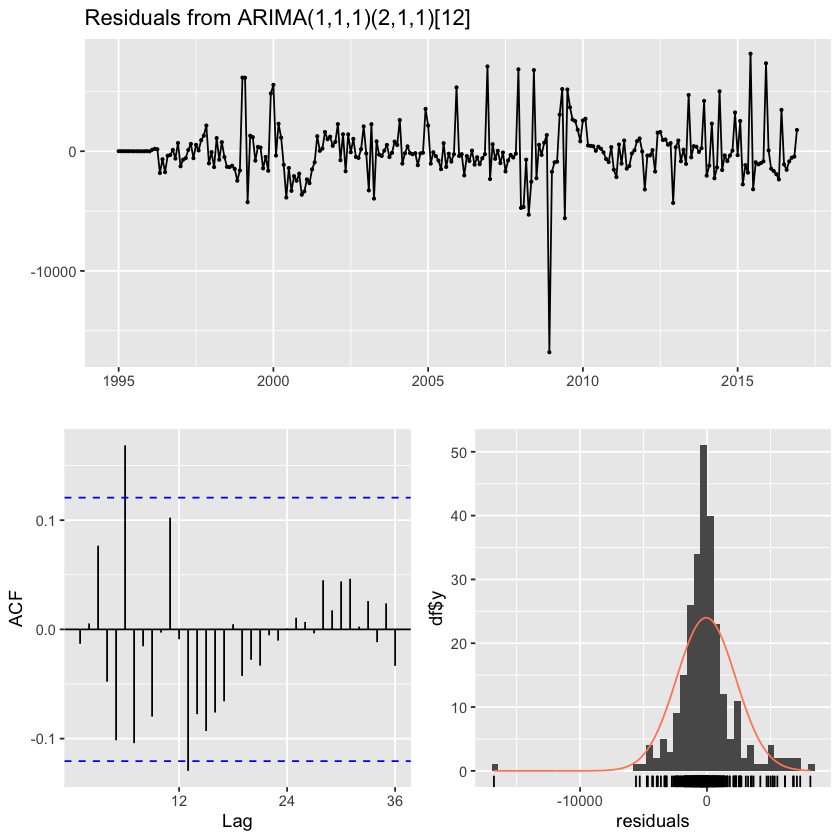

In [316]:
checkresiduals(ar1)

In [311]:
summary(aarima_fit_nostep)

Series: train 
ARIMA(1,0,1)(0,1,2)[12] 

Coefficients:
         ar1      ma1     sma1     sma2
      0.8540  -0.2695  -0.1198  -0.1818
s.e.  0.0446   0.0850   0.0681   0.0781

sigma^2 = 5820739:  log likelihood = -2319.19
AIC=4648.38   AICc=4648.63   BIC=4666.03

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 48.61346 2338.368 1342.614 -0.5019952 16.80925 0.5814427
                   ACF1
Training set 0.01062882


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(0,1,2)[12]
Q* = 28.871, df = 20, p-value = 0.09032

Model df: 4.   Total lags used: 24



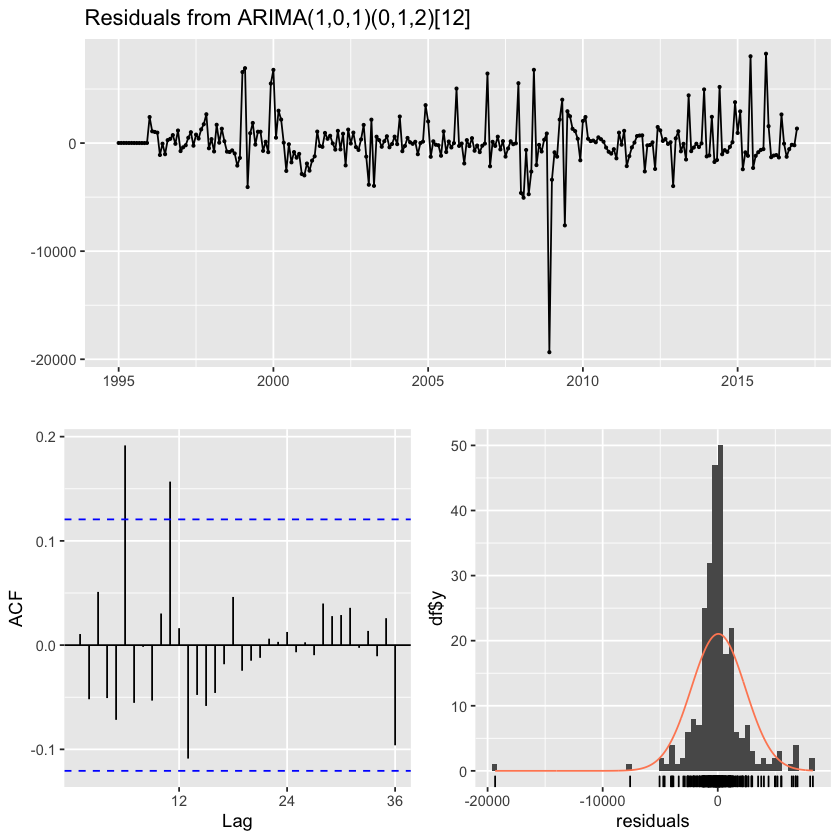

In [313]:
checkresiduals(aarima_fit_nostep)

In [312]:
summary(aarima_fit_nostep2)

Series: log(train) 
ARIMA(1,0,1)(1,1,1)[12] 

Coefficients:
         ar1      ma1    sar1     sma1
      0.9058  -0.3200  0.5571  -0.7129
s.e.  0.0333   0.0781  0.2426   0.2094

sigma^2 = 0.03941:  log likelihood = 50.98
AIC=-91.95   AICc=-91.71   BIC=-74.31

Training set error measures:
                     ME      RMSE       MAE         MPE     MAPE      MASE
Training set 0.00169084 0.1924119 0.1325757 -0.02515259 1.504203 0.5522764
                   ACF1
Training set 0.01359699

In [305]:
exp(0.1924119)

[1] 1.21217


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,1,1)[12]
Q* = 27.906, df = 20, p-value = 0.1116

Model df: 4.   Total lags used: 24



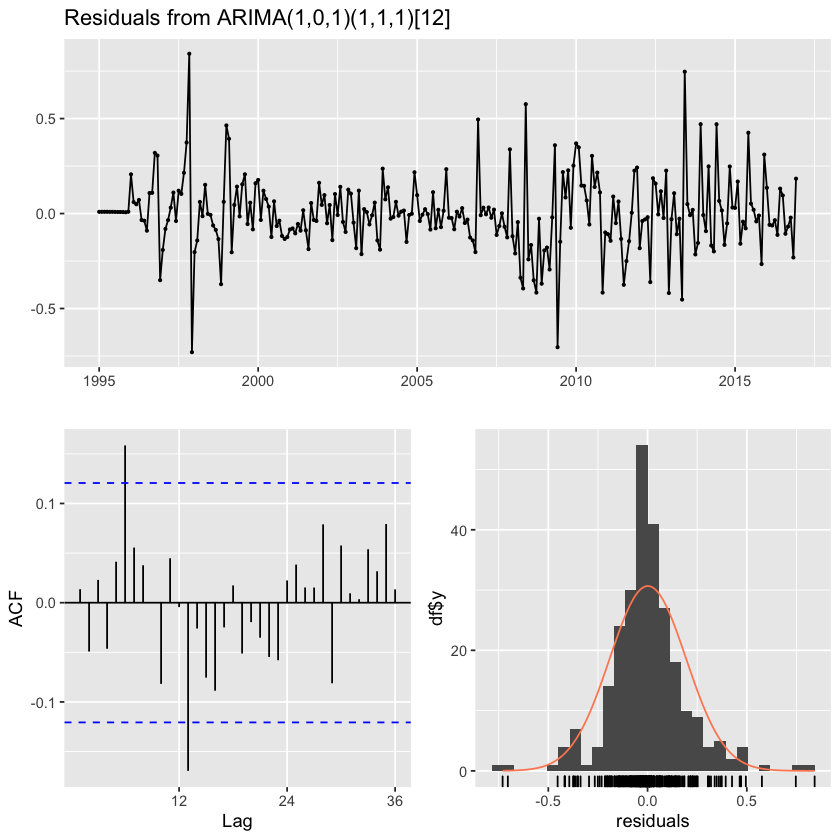

In [296]:
checkresiduals(aarima_fit_nostep2)

In [136]:
summary(aarima_fitd)

Series: train 
ARIMA(1,1,1)(0,1,2)[12] 

Coefficients:
         ar1      ma1     sma1     sma2
      0.4345  -0.7760  -0.1769  -0.2065
s.e.  0.1965   0.1559   0.0722   0.0815

sigma^2 = 6056397:  log likelihood = -2315.02
AIC=4640.03   AICc=4640.28   BIC=4657.66

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE     MASE        ACF1
Training set -37.61562 2380.421 1481.278 1.621089 23.03072 0.641494 -0.01996222


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(0,1,2)[12]
Q* = 35.984, df = 20, p-value = 0.01545

Model df: 4.   Total lags used: 24



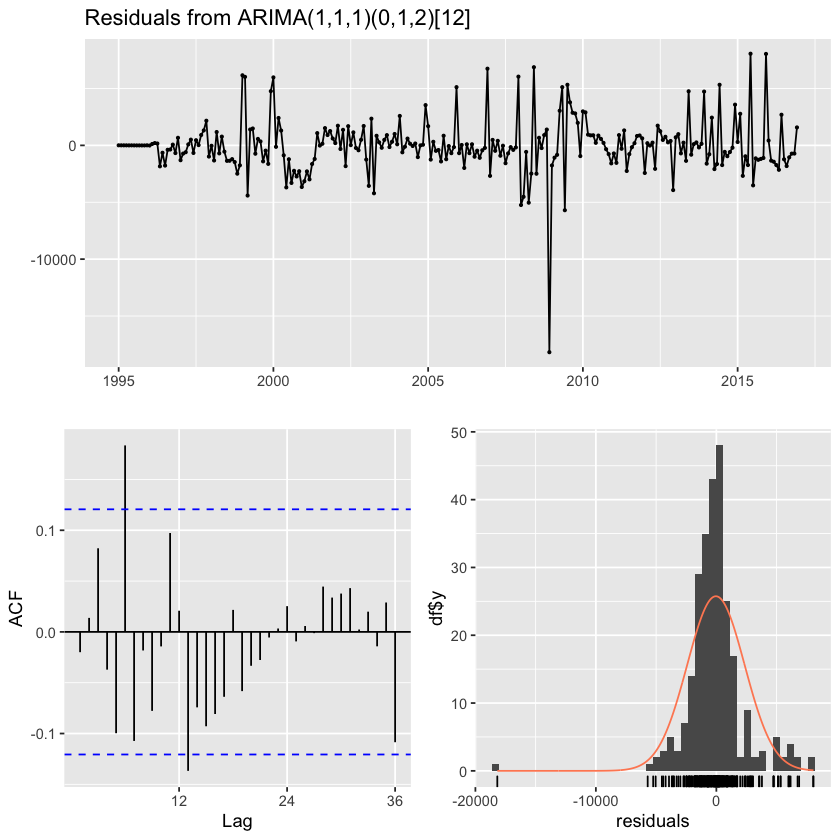

In [139]:
checkresiduals(aarima_fitd)

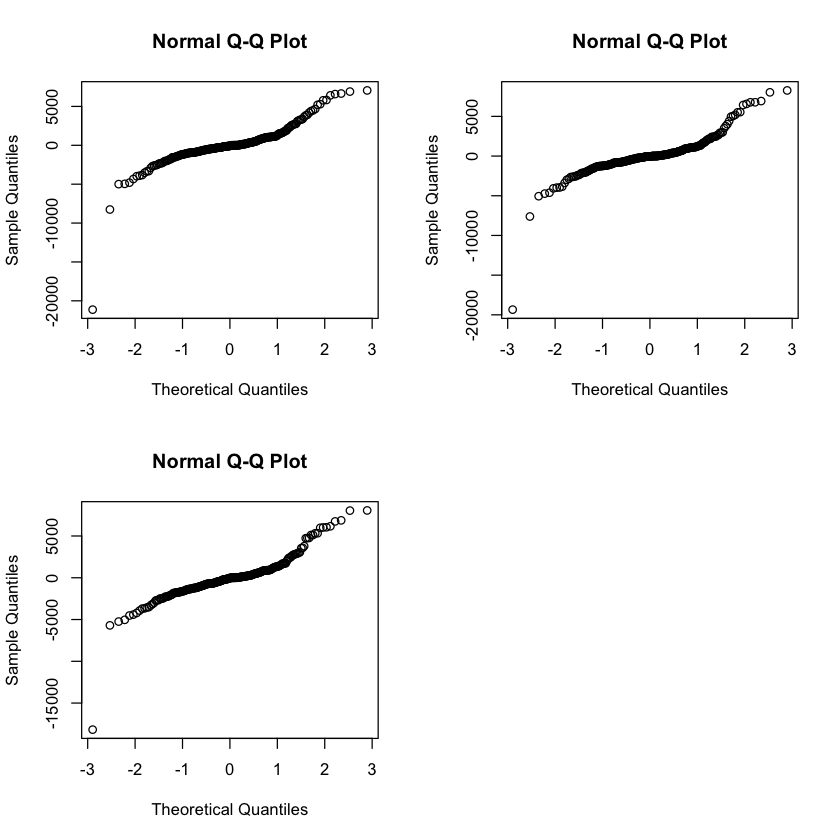

In [140]:
par(mfrow= c(2,2))
qqnorm(aarima_fit$residuals)
qqnorm(aarima_fit_nostep$residuals)
qqnorm(aarima_fitd$residuals)

ERROR: Error in ar.yw.mts(x, order.max = lag.max): Singular matrix in qr_solve


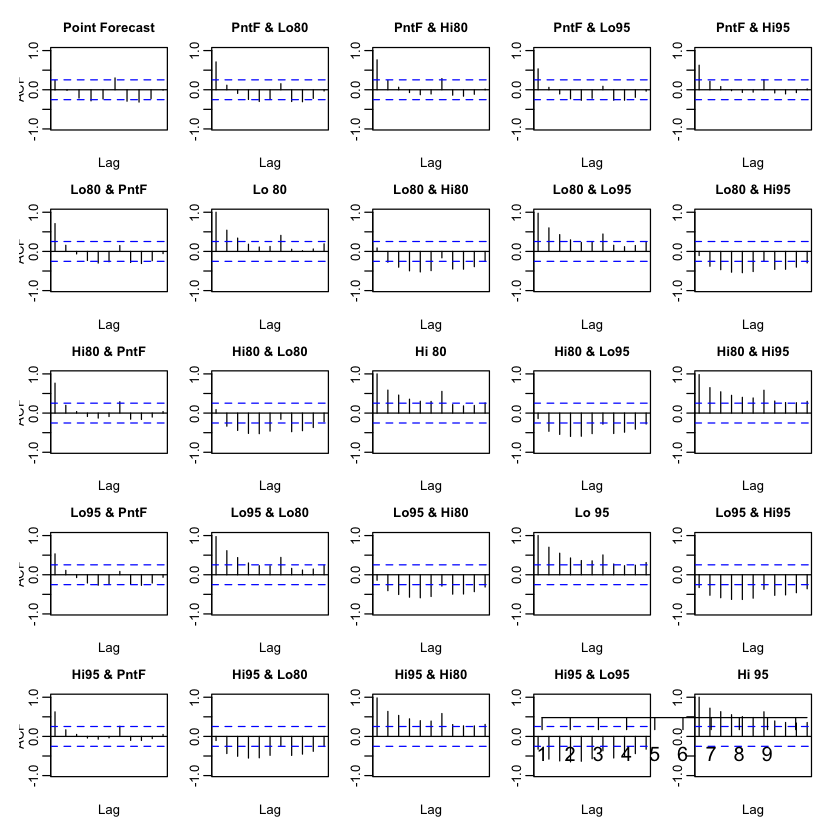

In [116]:
par(mfrow= c(1,2))
Acf(forecast(aarima_fitd, h=60))
Pacf(forecast(aarima_fitd, h=60))
plot.new
autoplot(train, series = "training data") +
  autolayer(forecast(aarima_fitd, h = 60), series= "arima(1,1,1)(0,1,2)[12] ") + # PI=F removes the range on the predicted series 
  autolayer(test, series = "test series data")
accuracy(as.vector(test), as.vector(forecast(exp_fit, h = 60)))


ERROR: Error in ar.yw.mts(x, order.max = lag.max): Singular matrix in qr_solve


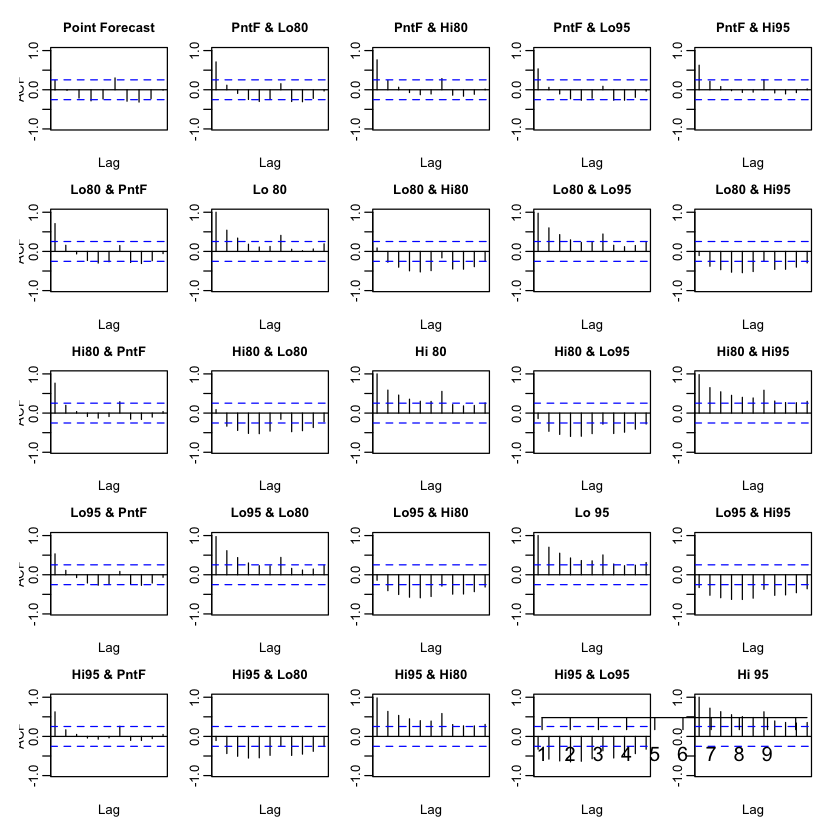

In [78]:
par(mfrow= c(1,2))
Acf(forecast(aarima_fitd, h=60))
Pacf(forecast(aarima_fitd, h=60))

function () 
{
    for (fun in getHook("before.plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    .External2(C_plot_new)
    grDevices:::recordPalette()
    for (fun in getHook("plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    invisible()
}
<bytecode: 0x7fa89cc940a8>
<environment: namespace:graphics>

ERROR: Error in mean(actual != predicted): 'list' object cannot be coerced to type 'integer'


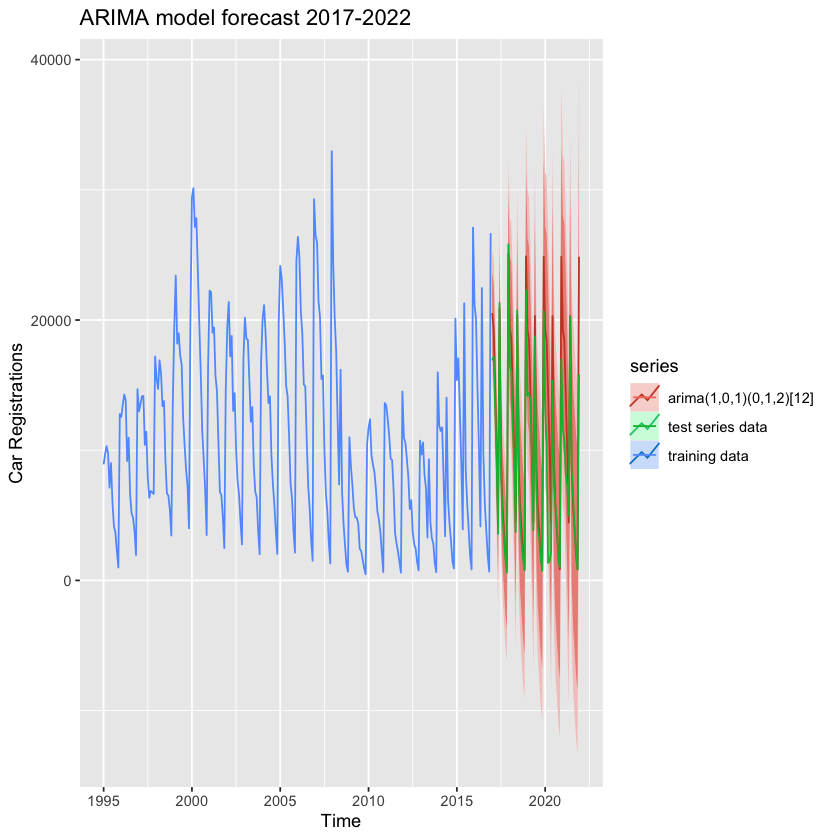

In [323]:
plot.new
autoplot(train, series = "training data", main='ARIMA model forecast 2017-2022', ylab='Car Registrations') +
  autolayer(forecast(ar2, h = 60), series= "arima(1,0,1)(0,1,2)[12] ") + # PI=F removes the range on the predicted series 
  autolayer(test, series = "test series data")
accuracy(as.vector(test), as.vector(forecast(ar2, h = 60)))

In [86]:
Performance = function(pred, val) { # function to find the performance of a prediction (pred) from a model over a test period (val)
  res = pred - val
  MAE = sum(abs(res))/length(val)
  RSS = sum(res^2)
  MSE = RSS/length(val)
  RMSE = sqrt(MSE)
  perf = data.frame(MAE, RSS, MSE, RMSE)
}

In [89]:
RMSE_ets <- rmse(test, forecast(exp_fit, h =60))

f <- predict(aarima_fitd, n.ahead = length(test))


ERROR: Error in `-.default`(actual, predicted): non-numeric argument to binary operator


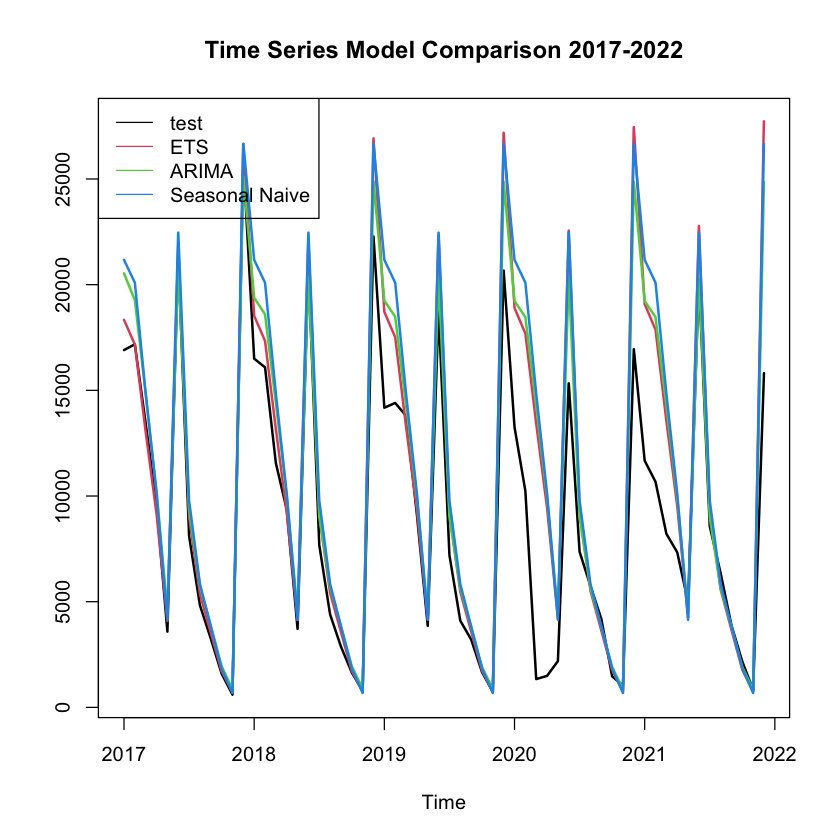

In [335]:
# find the predicted values for each model
pred_ets <- ts(forecast(exp_fit, h = 60)$mean, start = c(2017,1), frequency = 12, end= c(2021, 12))
pred_arima <- predict(ar2, n.ahead = length(test))$pred
pred_sn <- ts(forecast(snaive_fit, h = 60)$mean, start = c(2017,1), frequency = 12, end= c(2021, 12))
ets_perf <- cbind(Type = c("ETS(M,Ad,M) "), Performance(as.vector(pred_ets), test))
arima_perf <- cbind(Type = c("arima(1,0,1) (0,1,2)[12]"), Performance(as.vector(pred_arima), test))
snaive_perf <- cbind(Type = c("Seasonal Naive"), Performance(as.vector(pred_sn), test))
perf = rbind(ets_perf, arima_perf, snaive_perf)
#plot all models together over test period  
ts.plot(test, pred_ets, pred_arima, pred_sn,  col = 1:4, 
        lwd = 2, main="Time Series Model Comparison 2017-2022")
legend("topleft", c("test","ETS", "ARIMA", "Seasonal Naive"), lty = 1, 
           col = 1:4)


In [ ]:
ARIMA(1,0,1)(0,1,2)[12]

In [340]:
 sar <- auto.arima(ts_carreg, stepwise = F , ic = "aicc", D=1)

In [341]:
summary(sar)

Series: ts_carreg 
ARIMA(1,0,1)(0,1,2)[12] 

Coefficients:
         ar1      ma1     sma1     sma2
      0.8261  -0.2181  -0.1775  -0.1619
s.e.  0.0452   0.0811   0.0609   0.0724

sigma^2 = 5578374:  log likelihood = -2865.04
AIC=5740.07   AICc=5740.27   BIC=5758.79

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.899039 2302.802 1335.246 -2.077705 18.81832 0.6110578
                    ACF1
Training set 0.009780347

function () 
{
    for (fun in getHook("before.plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    .External2(C_plot_new)
    grDevices:::recordPalette()
    for (fun in getHook("plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    invisible()
}
<bytecode: 0x7fa89cc940a8>
<environment: namespace:graphics>

function () 
{
    for (fun in getHook("before.plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    .External2(C_plot_new)
    grDevices:::recordPalette()
    for (fun in getHook("plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    invisible()
}
<bytecode: 0x7fa89cc940a8>
<environment: namespace:graphics>

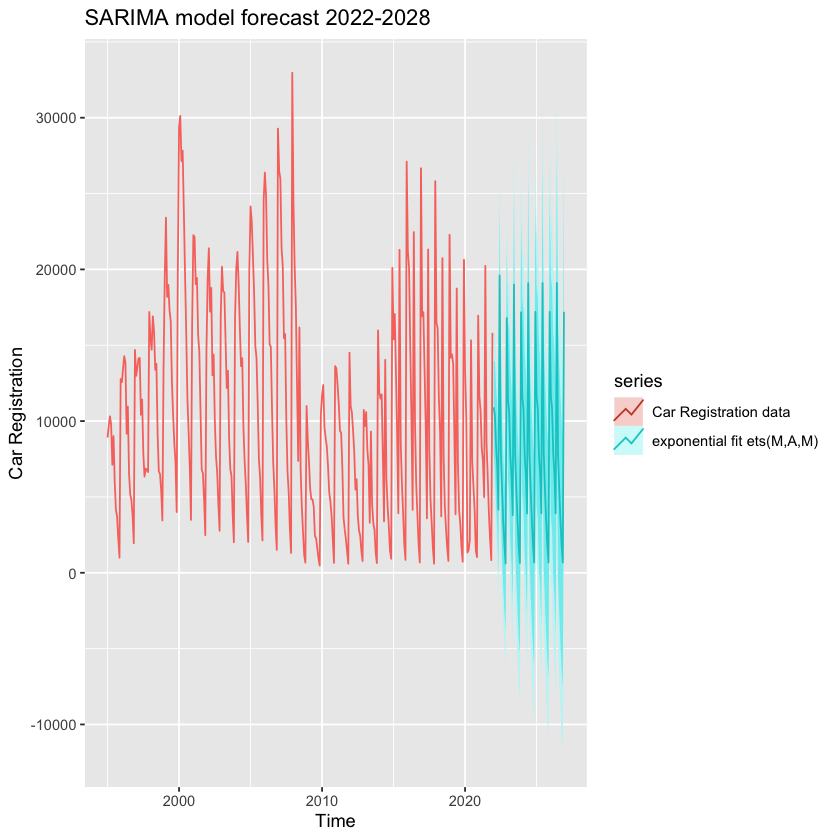

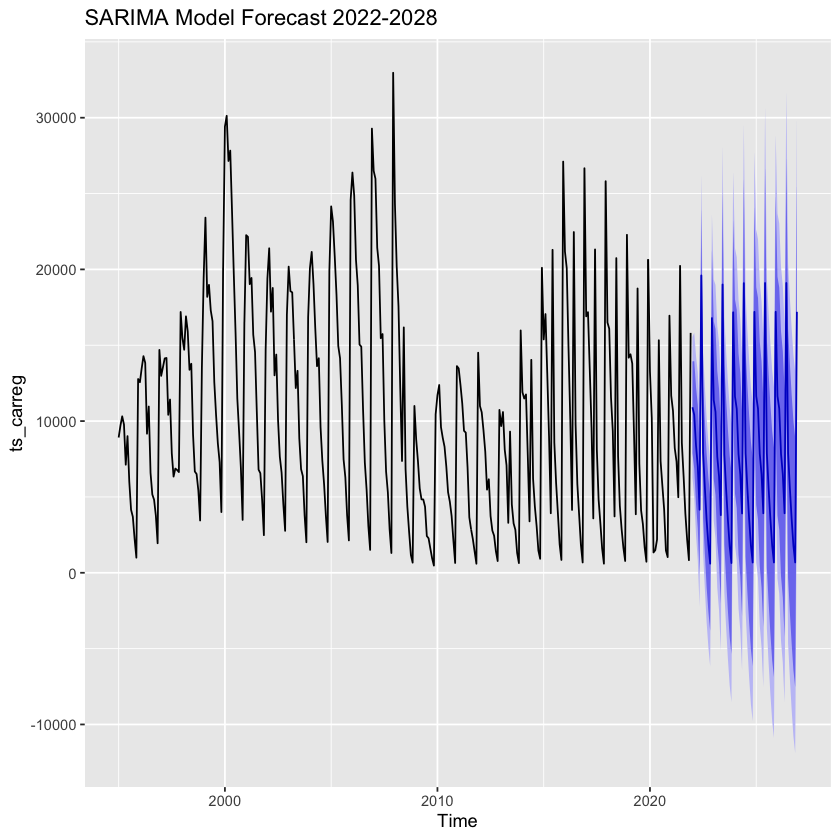

In [351]:
plot.new
autoplot(ts_carreg, series = "Car Registration data", main='SARIMA model forecast 2022-2028', ylab='Car Registration') +
  autolayer(forecast(sar, h = 60), series= "exponential fit ets(M,A,M)")

plot.new 
autoplot(forecast(sar, h = 60), series= "exponential fit ets(M,A,M)",main="SARIMA Model Forecast 2022-2028") 